<a href="https://colab.research.google.com/github/PabAleBravo/Proyectointegradorequipo14/blob/main/Avance5_Equipo14_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

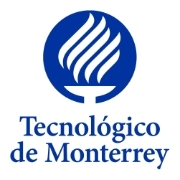


# Avance 5. Modelo Final

## Equipo 14

### A01793024 – Pablo Alejandro Bravo Vargas
### A00939319 - Brian Sánchez Hernández
### A00968460 - Josías Ruiz Peña


## Librerias

In [ ]:
#Librerias

import pandas as pd
import chardet
#pip install plotly
import plotly.express as px
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
!pip install lifelines
from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from lifelines import WeibullFitter
from lifelines.utils import concordance_index
from lifelines import ExponentialFitter
from lifelines import LogNormalFitter
from lifelines.utils import concordance_index
from lifelines.utils import median_survival_times
from lifelines import LogLogisticFitter



# **Avance 1** - Análisis exploratorio de datos

## Estructura de datos

Los datos se encuentran divididos en 12 archivos .xlsx ubicados en un repositorio en Github, por lo que se requiere concatenarlos en un DataFrame para llevar a cabo la exploración de datos.

Importar Datos del archivo de muestra de la información para su análisis.

In [ ]:
#Extracción de los datos

url_archivo1 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2301_Base%20Flujo.xlsx'
url_archivo2 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2302_Base%20Flujo.xlsx'
url_archivo3 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2303_Base%20Flujo.xlsx'
url_archivo4 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2304_Base%20Flujo.xlsx'
url_archivo5 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2305_Base%20Flujo.xlsx'
url_archivo6 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2306_Base%20Flujo.xlsx'
url_archivo7 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2307_Base%20Flujo.xlsx'
url_archivo8 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2308_Base%20Flujo.xlsx'
url_archivo9 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2309_Base%20Flujo.xlsx'
url_archivo10 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2310_Base%20Flujo.xlsx'
url_archivo11 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2311_Base%20Flujo.xlsx'
url_archivo12 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2312_Base%20Flujo.xlsx'

# Cargando el archivo
df_archivo1 = pd.read_excel(url_archivo1)
df_archivo2 = pd.read_excel(url_archivo2)
df_archivo3 = pd.read_excel(url_archivo3)
df_archivo4 = pd.read_excel(url_archivo4)
df_archivo5 = pd.read_excel(url_archivo5)
df_archivo6 = pd.read_excel(url_archivo6)
df_archivo7 = pd.read_excel(url_archivo7)
df_archivo8 = pd.read_excel(url_archivo8)
df_archivo9 = pd.read_excel(url_archivo9)
df_archivo10 = pd.read_excel(url_archivo10)
df_archivo11 = pd.read_excel(url_archivo11)
df_archivo12 = pd.read_excel(url_archivo12)

# Concatenarlo

df = pd.concat([df_archivo1, df_archivo2, df_archivo3, df_archivo4, df_archivo5, df_archivo6, df_archivo7, df_archivo8, df_archivo9, df_archivo10, df_archivo11, df_archivo12])

df.head()

Guardar DataSet combiando a un archivo facilmente importable.

In [150]:
df.to_csv('/content/2023_Dataset.csv', index=False)

Forma del dataset

In [ ]:
rows, columns = df.shape
print(f'El dataset contiene {rows} registros y {columns} columnas.')

Análisis descriptivo

In [ ]:
print(df.describe())
print(df.describe(include=['object']))

In [ ]:
df.info()

In [ ]:
# Calculando la cardinalidad de las variables
cardi = df.columns
for i in cardi:
  cardinality = df[i].nunique()
  print(f"Cardinalidad de {i}: {cardinality}")


## Análisis univariante

Para entender las características de las variables más importantes.

In [ ]:

# Visualizando la cantidad de eventos por día de variable Fechallegada
monthly_counts = df['Fechallegada'].dt.to_period('M').value_counts().sort_index()
xs = monthly_counts.index
ys = monthly_counts.values
xss = xs.astype(str)
plt.figure(figsize=(13, 4))
plt.bar(xss, ys)
plt.xlabel('Mes')
plt.ylabel('Eventos')
plt.title('Cantidad de eventos por mes, variable Fechallegada')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Análisis descriptivo de la variable CostoPagado
description = df.CostoPagado.describe()
print(description)
sns.violinplot(data=df.CostoPagado, orient="h")
plt.title('Violin Plot de CostoPagado (var. dependiente)')
plt.ylabel('MXN')

plt.show()

In [ ]:
# Visualizando la frecuencia (top 5) de las variables categóricas

value_counts1 = df['Tiposervicio'].value_counts().nlargest(5)
value_counts2 = df['Servicio'].value_counts().nlargest(5)
value_counts3 = df['EstatusExp'].value_counts().nlargest(5)
value_counts4 = df['EntidadOrigen'].value_counts().nlargest(5)
value_counts5 = df['MunicipioOrigen'].value_counts().nlargest(5)
value_counts6 = df['lugardelevento'].value_counts().nlargest(5)
value_counts7 = df['dsBlindaje'].value_counts().nlargest(5)
value_counts8 = df['ClasificaAuto'].value_counts().nlargest(5)
value_counts9 = df['CitaProg'].value_counts().nlargest(5)
value_counts10 = df['dsTipoAsignacion'].value_counts().nlargest(5)
value_counts11 = df['importeprov'].value_counts().nlargest(5)
value_counts12 = df['Entidaddestino'].value_counts().nlargest(5)
value_counts13 = df['Municipiodestino'].value_counts().nlargest(5)
value_counts14 = df['EspecifiqueCarga'].value_counts().nlargest(5)
value_counts15 = df['dsMarcaAuto'].value_counts().nlargest(5)


fig, axs = plt.subplots(nrows=8, ncols=2, figsize=(20, 30))
fig.suptitle('Frecuencia de variables categóricas', fontsize=15, verticalalignment='top')

plt.subplots_adjust(top=25)
axs[0, 0].bar(value_counts1.index, value_counts1.values)
axs[0, 0].set_title('Tiposervicio')
axs[0, 0].set_ylabel('Frecuencia')

axs[0, 1].bar(value_counts2.index, value_counts2.values)
axs[0, 1].set_title('Servicio')
axs[0,1].set_ylabel('Frecuencia')

axs[1,0].bar(value_counts3.index, value_counts3.values)
axs[1,0].set_title('EstatusExp')
axs[1,0].set_ylabel('Frecuencia')

axs[1,1].bar(value_counts4.index, value_counts4.values)
axs[1,1].set_title('EntidadOrigen')
axs[1,1].set_ylabel('Frecuencia')

axs[2,0].bar(value_counts5.index, value_counts5.values)
axs[2,0].set_title('MunicipioOrigen')
axs[2,0].set_ylabel('Frecuencia')

axs[2,1].bar(value_counts6.index, value_counts6.values)
axs[2,1].set_title('lugardelevento')
axs[2,1].set_ylabel('Frecuencia')

axs[3,0].bar(value_counts8.index, value_counts8.values)
axs[3,0].set_title('ClasificaAuto')
axs[3,0].set_ylabel('Frecuencia')

axs[3,1].bar(value_counts7.index, value_counts7.values)
axs[3,1].set_title('dsBlindaje')
axs[3,1].set_ylabel('Frecuencia')

axs[4,0].bar(value_counts9.index, value_counts9.values)
axs[4,0].set_title('CitaProg')
axs[4,0].set_ylabel('Frecuencia')

axs[4,1].bar(value_counts10.index, value_counts10.values)
axs[4,1].set_title('dsTipoAsignacion')
axs[4,1].set_ylabel('Frecuencia')

axs[5,0].bar(value_counts11.index, value_counts11.values)
axs[5,0].set_title('importeprov')
axs[5,0].set_ylabel('Frecuencia')

axs[5,1].bar(value_counts12.index, value_counts12.values)
axs[5,1].set_title('Entidaddestino')
axs[5,1].set_ylabel('Frecuencia')

axs[6,0].bar(value_counts13.index, value_counts13.values)
axs[6,0].set_title('Municipiodestino')
axs[6,0].set_ylabel('Frecuencia')

axs[6,1].bar(value_counts14.index, value_counts14.values)
axs[6,1].set_title('EspecifiqueCarga')
axs[6,1].set_ylabel('Frecuencia')

axs[7,0].bar(value_counts15.index, value_counts15.values)
axs[7,0].set_title('dsMarcaAuto')
axs[7,0].set_ylabel('Frecuencia')


plt.tight_layout(pad=3.0)

plt.show()


In [ ]:
df_X = ['Tiposervicio','Servicio','SubServicio','EstatusExp','FechaApertura','FechaAsignacion','Fechallegada','EntidadOrigen','MunicipioOrigen','Costo','lugardelevento','EstatusProv','dsBlindaje','ClasificaAuto','CitaProg','dsTipoAsignacion','importeprov','Entidaddestino','Municipiodestino','clCuenta','TieneCita','ProveedorAsignado','CntMonitoreosAProveedor','EspecifiqueCarga','dsMarcaAuto','LatitudExp','LongitudExp','CP','dsTipoAuto','Cl Proveedor','Fecha_AsisConcluida','Fecha_Termino','Fecha_RegisPago']
df_Y = ['CostoPagado']

## Análisis bi/multivariante

## Preprocesamiento

Con el fin de contar con datos de calidad que nos sirvan para su correcto análisis y modelado, es necesario implementar una serie de transformaciones para definir qué hacer con los valores nulos/faltantes y eliminar variables que no son de utilidad.

Por lo anterior, definimos una serie de reglas a implementar en el dataset.

### Aplicación de reglas

Con el fin de mejorar la calidad de la base de datos, es necesario aplicar las siguientes reglas de limpieza y manipulación de datos:

1. Tipo de Servicio: Sólo considerar 'Emergencia', ya que son los servicios que brindo un proveedor en el momento que lo solicitó un usuario.
2. Estatus: Quitar los servicios Cancelado al Momento, por que no se asignó un proveedor y por lo tanto no generan un costo.
3. Estatus Proveedor: Quitar los NULL por que no se asigno un proveedor.
4. Eliminar los servicios de Siniestrios
5. Especifique Carga: Es un campo que sirve sólo para algunas cuentas por lo que esta casi siempre vacio
6. Sí el campo Entidad/Municipio destino esta vació se debe colocar Entidad/Municipio Origen, por que muchos de los servicios que son en el mismo origen a los coordinadores se les olvida llenar este campo.
7. Si el campo Lugar del Evento esta vacio, realizar esta regla, si Entidad Origen y Entidad Destino son iguales, el servicio es NO CARRETERO, sí Entidad Origen y Entidad Destino son diferentes, el servicio es CARRETERO, los faltantes son NO CARRETEROS

In [ ]:
#Dataframe para limpieza
df_clean = df

In [ ]:

# Aplicación Regla 1
df_clean = df_clean[df_clean["Tiposervicio"] == "EMERGENCIA"]

# Aplicación Regla 2
df_clean = df_clean[df_clean["EstatusExp"] != "Cancelado al Momento"]

# Aplicación Regla 3
df_clean = df_clean[df_clean["EstatusProv"] != "NULL"]

# Aplicación Regla 4
df_clean = df_clean[df_clean["Servicio"] != "Siniestros"]

# Aplicación Regla 5
columnas = ["EspecifiqueCarga"]
df_clean = df_clean.drop(columns=columnas, errors='ignore')

# Aplicación Regla 6

df_clean['Municipiodestino'] = df_clean['Municipiodestino'].fillna(df_clean['MunicipioOrigen'])
df_clean['Entidaddestino'] = df_clean['Entidaddestino'].fillna(df_clean['EntidadOrigen'])

# Aplicación Regla 7

def replace_lugarevento(row):
    if row['EntidadOrigen'] == row['Entidaddestino']:
        return 'NO CARRETERO'
    else:
        return 'CARRETERO'

df_clean['lugardelevento'] = df_clean['lugardelevento'].fillna(df_clean.apply(replace_lugarevento, axis=1))

valoresfaltantes= df_clean.isnull().sum()
valoresfaltantes

In [ ]:
rows, columns = df.shape
print(f'El dataset base contiene {rows} registros y {columns} columnas.')
rows, columns = df_clean.shape
print(f'El dataset limpio contiene {rows} registros y {columns} columnas.')

Convertir tipo de variables

In [ ]:
df_labels = df_clean.columns.tolist()
print(df_labels)

In [ ]:
df_labels = ['Expediente','Tiposervicio','Servicio','SubServicio','EstatusExp','FechaApertura','FechaAsignacion','Fechallegada','EntidadOrigen','MunicipioOrigen','Costo','CostoPagado','lugardelevento','EstatusProv','dsBlindaje','ClasificaAuto','CitaProg','dsTipoAsignacion','importeprov','Entidaddestino','Municipiodestino','clCuenta','TieneCita','ProveedorAsignado','CntMonitoreosAProveedor','EspecifiqueCarga','dsMarcaAuto','LatitudExp','LongitudExp','CP','dsTipoAuto','Cl Proveedor','Fecha_AsisConcluida','Fecha_Termino','Fecha_RegisPago','EstatusCXP']

In [ ]:
df_column_time = ['FechaApertura','FechaAsignacion','Fechallegada','Fecha_Termino','Fecha_AsisConcluida','FechasRegisFactura']
for col in df_column_time:
    print(col)
    df_clean[col] = pd.to_datetime(df_clean[col], format='%d/%m/%Y')


In [ ]:
df_column_date = ['Fecha_RegisPago']
for col in df_column_date:
    print(col)
    #clean integers in date column
    df_clean.loc[df_clean[col].notnull() & df_clean[col].astype(str).str.isdigit(), col] = pd.NA
    df_clean[col] = pd.to_datetime(df_clean[col], format='%Y-%m-%d')

In [ ]:
df_clean.loc[df_clean['CitaProg'] == 'NO', 'CitaProg'] = 0
df_clean.loc[df_clean['CitaProg'] == 'SI', 'CitaProg'] = 1

In [ ]:
df_clean.loc[df_clean['importeprov'] == 'Con Costo', 'importeprov'] = 1
df_clean.loc[df_clean['importeprov'] == 'Sin Costo', 'importeprov'] = 0

In [ ]:
df_column_bin = ['CitaProg','importeprov','TieneCita','ProveedorAsignado']
for col in df_column_bin:
    print(col)
    df_clean[col] = df_clean[col].astype(bool)

In [ ]:
df_column_class = ['Tiposervicio','Servicio','SubServicio','EstatusExp','EntidadOrigen','MunicipioOrigen','lugardelevento','EstatusProv','dsBlindaje','ClasificaAuto','dsTipoAsignacion','Entidaddestino','Municipiodestino','dsMarcaAuto','EstatusCXP']
for col in df_column_class:
    print(col+'_index')
    df_clean[col+'_index'] = pd.factorize(df_clean[col])[0]

#lista de categorias indexadas
df_column_class_index = [item + '_index' for item in df_column_class]

In [ ]:
#Limpieza de valores nulos con 0 y que no afectan a al modelo
df_clean['CP'].fillna(0, inplace=True)
df_clean['Costo'].fillna(0, inplace=True)
df_clean['CostoPagado'].fillna(0, inplace=True)

In [ ]:
df_column_cost = ['Costo','CostoPagado']

In [ ]:
df_column_int = ['Expediente','clCuenta','CntMonitoreosAProveedor','CP','Cl Proveedor']
for col in df_column_int:
    print(col)
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce').astype(int)

In [ ]:
df_label_processed = df_column_time+df_column_date+df_column_bin+df_column_class_index+df_column_int+df_column_cost
df_label_processed

In [ ]:
df_col_class = [i for i in df_labels if i not in df_label_processed+df_column_class]
df_col_class

Descartamos estas 4 variables por errores en la información proporcionada desde la fuente.

In [ ]:
df_clean.info()

In [ ]:
df_clean.nunique()

In [ ]:
df_clean.head()

In [ ]:
df_analysis = pd.DataFrame()
for col in df_label_processed:
  df_analysis[col] = df_clean[col]
df_analysis.info()

Guardar dataset para analisis

In [ ]:
df_analysis.to_csv('/content/2023_Analysis_Dataset.csv', index=False)

## Conclusiones Avance 1


El análisis exploratorio de datos (EDA) nos permitió entender las características clave de nuestro dataset. Mediante técnicas estadísticas y visuales, como histogramas y el cálculo de cardinalidad, analizamos y comprendimos los datos.

¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia? `

Se implementaron reglas de negocio específicas para mitigar la incidencia de datos incompletos o ausentes, lo que nos ayudo significativamente a mejorar la calidad del conjunto de datos. Una de los cambios más notables fue la identificación de errores, inconsistencias y valores nulos en las variables 'EntidadDestino' y 'MunicipioDestino'. Para cambiar este problema, el área de operaciónes nos indicó que este comportamiento es un error tipo en la operación: los valores faltantes en estas variables fueron reemplazados por los correspondientes de 'EntidadOrigen' y 'MunicipioOrigen'. Ya que, habitualmente, los coordinadores no completan los campos de destino cuando el servicio se lleva a cabo en el mismo lugar de origen.

¿Cuáles son las estadísticas resumidas del conjunto de datos?

El conjunto de datos contiene un total de 491,281 registros, abarcando 37 columnas distintas. Estos registros representan todos los servicios de asistencia vial prestados durante el año 2023. Sin embargo, tras la aplicación de reglas de negocio para mejorar la relevancia de los datos, la base se redujo a 393,865 registros. Este proceso de filtrado asegura que el análisis se centre en los datos más pertinentes. Se presentan en promedio 30,000 a 35,000 servicios mensuales, en el cual se destaca el subservicio de arrastre de grúa ya que es el más utilizado, el cual representa el 87% de los servicios de asistencia vial. Además, el 68% de estos servicios son clasificados como 'No carreteros', lo que indica una predominancia de servicios en zonas urbanas. En cuanto a los costos, el análisis muestra que el costo promedio de los servicios de asistencia vial es de 1,224 pesos mexicanos. Sin embargo, es importante señalar que en el 75% de los casos, el costo promedio es menor a 1,149 pesos mexicanos. Esta distribución de costos proporciona una visión valiosa sobre la estructura de precios de los servicios y será un factor clave cuando calculemos el monto del flujo de efectivo y las proyección de pago a los proveedores.

¿Hay valores atípicos en el conjunto de datos?

En el análisis descriptivo de la variable 'CostoPagado', notamos un sesgo significativo y la presencia de numerosos outliers. Existen servicios con costo de 195,000 pesos mexicanos, que por el tipo de servicios podrían ser errores o servicios que requirieron de alguna complejidad mayor. Tendremos que analizarlo, para el pronóstico del costo de los servicios abiertos.

¿Cuál es la cardinalidad de las variables categóricas?

Las principales variables cuenta con la siguiente cardinalidad una vez aplicado las reglas de negocio:

Cardinalidad de SubServicio: 5
Cardinalidad de EstatusExp: 4
Cardinalidad de lugardelevento: 2
Cardinalidad de EstatusProv: 4
Cardinalidad de ClasificaAuto: 6
Cardinalidad de CitaProg: 2
Cardinalidad de dsTipoAsignacion: 6
Cardinalidad de TieneCita: 2
Cardinalidad de dsMarcaAuto: 73
Cardinalidad de EstatusCXP: 2
¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?

Realizamos el análisis de sesgo para la variable númerica del costo, en el cual obtuvimos un resultado de asimetria del 14.98, este es un valor muy alto, lo que indica un sesgo extremadamente fuerte hacia la derecha y una cola larga hacia la derecha sugiere la presencia de valores extremadamente altos en comparación con el resto de los datos.

Al aplicar la transformación logarítmica, la asimetría se ha reducido significativamente, pero nos dió negativa. Lo que significa que la transformación ha sobreajustado la corrección del sesgo original, creando una nueva distribución con una cola larga hacia la izquierda, por lo que debemos de buscar otro tipo de transformación.

La transformación de Box-Cox nos dió una asimetría del -0.08, Esta asimetría es muy cerca de cero, lo que sugiere que la distribución de tus datos transformados es ahora aproximadamente normal.

¿Hay correlación entre las variables dependientes e independientes?

No existe una estrecha relación particular entre el costo y las variables dependientes, lo que suguiere que el costo se determina por más de una variable.

¿Cómo se distribuyen los datos en función de diferentes categorías?

En el análisis de la distribución de los datos se utilizaron histogramas para obtener una visualización de las diferentes categorías. El servicio más utilizado es el arrastre de grúa, además, se observó que la mayoría de los servicios son clasificados como 'No Carreteros'.

Otro aspecto fue que predominaron los servicios brindados en la Ciudad de México (CDMX), particularmente a vehículos particulares. Entre las marcas de automóviles, Chevrolet y Nissan.

El análisis de datos nos permitió conocer cuáles son los tipos de servicios más frecuentes, en qué entidades se generan la mayor cantidad de servicios, los costos por tipo de servicio, los tipos de vehículos que más servicios demandan, entre otra información de gran importancia a la hora de estimar los costos por pagar.


## **Avance 2** - Ingeniería de características

Análisis de Asimetría

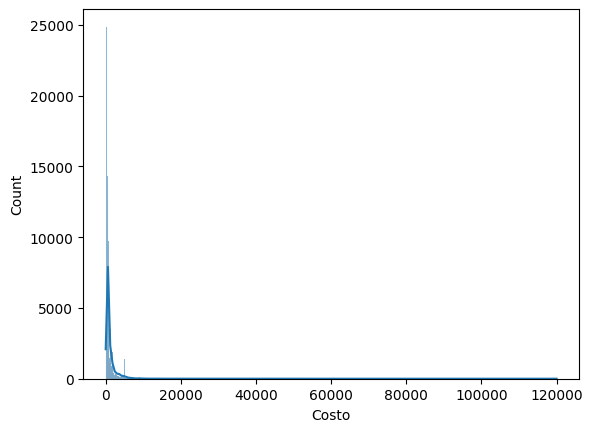

Asimetría original: 17.265444473668268


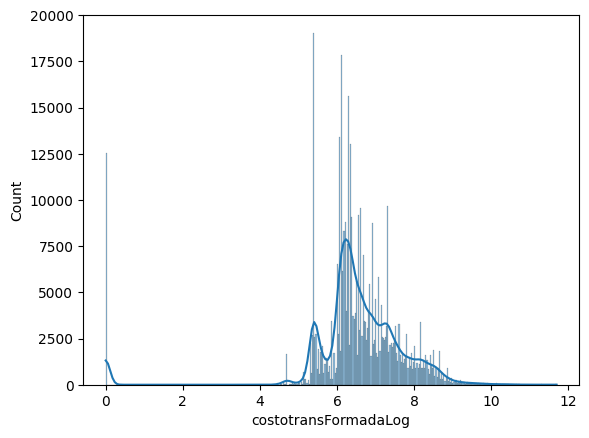

Asimetría transformación Logarítmica: -2.4689930723011555


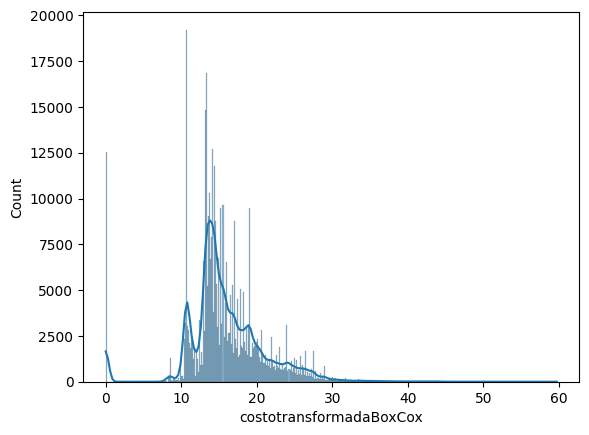

Asimetría después de la transformación Box-Cox: 0.30642748272719816


In [152]:
#Distribución Original
sns.histplot(df_analysis['Costo'], kde=True)
plt.show()

# Asimetría original
print("Asimetría original:", df_analysis['Costo'].skew())

# Transformación logarítmica


df_analysis['costotransFormadaLog'] = np.log1p(df_analysis['Costo'])

# Gráfica Transformación logarítmica
sns.histplot(df_analysis['costotransFormadaLog'], kde=True)
plt.show()

# Calculamos Asimetría de la Transformación Logarítmica
print("Asimetría transformación Logarítmica:", df_analysis['costotransFormadaLog'].skew())

#Transformación Box-Cox

# Revisamos que los valores sean mayores a 0
df_analysis['Costo'] = df_analysis['Costo'] + 1

# Transformación de Box-Cox
df_analysis['costotransformadaBoxCox'], fitted_lambda = stats.boxcox(df_analysis['Costo'])

# Gráfica Transformación Box-Cox
sns.histplot(df_analysis['costotransformadaBoxCox'], kde=True)
plt.show()

# Calculamos Asimetría de la Transformación Box-Cox
print("Asimetría después de la transformación Box-Cox:", pd.Series(df_analysis['costotransformadaBoxCox']).skew())

<ipython-input-153-db70633768b3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_analysis.corr()


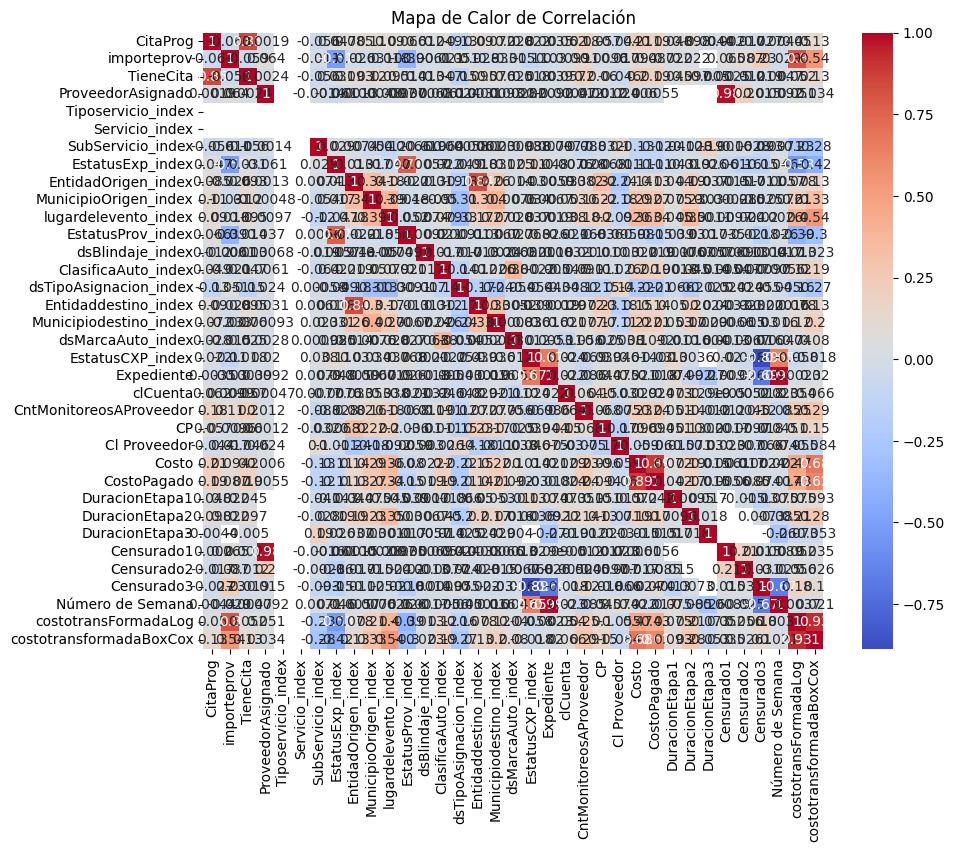

                         CitaProg  importeprov  TieneCita  ProveedorAsignado  \
CitaProg                 1.000000    -0.063370   0.849940           0.001923   
importeprov             -0.063370     1.000000  -0.059268           0.063967   
TieneCita                0.849940    -0.059268   1.000000           0.002441   
ProveedorAsignado        0.001923     0.063967   0.002441           1.000000   
Tiposervicio_index            NaN          NaN        NaN                NaN   
Servicio_index                NaN          NaN        NaN                NaN   
SubServicio_index       -0.056086    -0.010565  -0.056345          -0.001400   
EstatusExp_index         0.046733    -0.511929   0.030844          -0.061208   
EntidadOrigen_index      0.085410    -0.025596   0.092518           0.001272   
MunicipioOrigen_index    0.107631    -0.031437   0.115544          -0.000483   
lugardelevento_index     0.089804     0.017738   0.095164          -0.009730   
EstatusProv_index        0.065960    -0.

In [153]:
# Calculando la correlación
correlation_matrix = df_analysis.corr()

# Visualizando la correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Mapa de Calor de Correlación")
plt.show()

print(correlation_matrix)

Para realizar un análisis de supervivencia se identificaron tres etapas(de *FechaApertura* a *Fecha_AsisConcluida*, de *Fecha_AsisConcluida* a *Fecha_Termino*, y de *Fecha_Termino* a *FechasRegisFactura*), deberíamos considerar cada etapa como un análisis separado, dado que cada una representa un proceso distinto y, por ende, podría estar influenciada por factores diferentes.

1. **Etapa 1:** De *FechaApertura* a *Fecha_AsisConcluida*
Esta etapa es el tiempo desde la apertura del expediente hasta la conclusión de la asistencia, es decir, cuando el proveedor termina el servicio.

2. **Etapa 2:** De *Fecha_AsisConcluida* a *Fecha_Termino*
Esta etapa representa el tiempo desde la conclusión de la asistencia hasta el término oficial del expediente. Cuando se han validado los costos incurridos en el servicio y es un servicio facturable

3. **Etapa 3:** De *Fecha_Termino* a *FechasRegisFactura*
Finalmente, esta etapa abarca desde el término del expediente hasta el registro de la factura, indicando el tiempo para finalizar el aspecto financiero del servicio y cuando se ha pagado

Etapa 1

In [154]:
# Etapa 1

df_analysis['Semana'] = df_analysis['FechaApertura'].dt.isocalendar().week

# Calculando la duración en días

df_analysis['DuracionEtapa1'] = (df_analysis['Fecha_AsisConcluida'] - df_analysis['FechaApertura']).dt.days

# Identificando registros censurados
df_analysis['Censurado'] = df_analysis['Fecha_AsisConcluida'].notna().astype(int)

df_analysis.describe()

,Tiposervicio_index,Servicio_index,SubServicio_index,EstatusExp_index,EntidadOrigen_index,MunicipioOrigen_index,lugardelevento_index,EstatusProv_index,dsBlindaje_index,ClasificaAuto_index,...,DuracionEtapa2,DuracionEtapa3,Censurado1,Censurado2,Censurado3,Número de Semana,costotransFormadaLog,costotransformadaBoxCox,Semana,Censurado
count,393920.0,393920.0,393920.000000,393920.000000,393920.000000,393920.000000,393920.000000,393920.000000,393920.000000,393920.000000,...,392619.000000,243934.000000,393920.000000,393920.000000,393920.000000,393920.0,393920.000000,393920.000000,393920.0,393920.000000
mean,0.0,0.0,0.182971,0.115831,7.974756,105.080194,0.324299,0.155587,0.013561,0.170288,...,7.888765,16.392643,0.999860,0.996697,0.620423,26.826635,6.475097,15.820301,26.826635,0.999860
std,0.0,0.0,0.516189,0.335633,7.859710,197.304258,0.468178,0.362954,0.230822,0.649637,...,11.927817,27.614107,0.011815,0.057374,0.485282,15.022451,1.459732,5.339957,15.022451,0.011815
min,0.0,0.0,0.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,...,-35.000000,-109.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.0,0.000000
25%,0.0,0.0,0.000000,0.000000,3.000000,20.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,1.000000,1.000000,0.000000,14.0,6.111467,13.384000,14.0,1.000000
50%,0.0,0.0,0.000000,0.000000,5.000000,36.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,7.000000,1.000000,1.000000,1.000000,27.0,6.478510,14.946008,27.0,1.000000
75%,0.0,0.0,0.000000,0.000000,12.000000,90.000000,1.000000,0.000000,0.000000,0.000000,...,10.000000,20.000000,1.000000,1.000000,1.000000,40.0,7.178545,18.316749,40.0,1.000000
max,0.0,0.0,4.000000,3.000000,32.000000,1814.000000,2.000000,3.000000,5.000000,5.000000,...,202.000000,266.000000,1.000000,1.000000,1.000000,52.0,11.695255,59.705337,52.0,1.000000


In [155]:
censurados_count = df_analysis['Censurado'].value_counts()
censurados_count

1    393865
0        55
Name: Censurado, dtype: int64

Aunque la mayoría de los servicios se concluyen en 2 días, hay una cola larga de casos que toman mucho más tiempo en concluir. La desviación estándar en comparación con la media nos puede indicar una distribución de duraciones sesgada, con una minoría de casos extendiéndose con duración más alta.

# Modelo de Cox
Este modelo permite explorar cómo las diferentes covariables afectan el riesgo relativo de que ocurra el evento de interés a lo largo del tiempo.

In [156]:
#MODELO COX

df_cox = df_analysis[['DuracionEtapa1', 'Censurado','SubServicio_index','lugardelevento_index']].copy()
df_cox.dropna(inplace=True)

cph = CoxPHFitter()

cph.fit(df_cox, duration_col='DuracionEtapa1', event_col='Censurado')


print(cph.summary)

                          coef  exp(coef)  se(coef)  coef lower 95%  \
covariate                                                             
SubServicio_index     0.186830   1.205423  0.002998        0.180953   
lugardelevento_index -0.187496   0.829033  0.003433       -0.194224   

                      coef upper 95%  exp(coef) lower 95%  \
covariate                                                   
SubServicio_index           0.192707             1.198359   
lugardelevento_index       -0.180768             0.823474   

                      exp(coef) upper 95%  cmp to          z    p  -log2(p)  
covariate                                                                    
SubServicio_index                1.212528     0.0  62.309509  0.0       inf  
lugardelevento_index             0.834629     0.0 -54.621267  0.0       inf  


Interpretación de los Resultados

Coeficiente (coef): 0.186830. Un incremento unitario en SubServicio_index está asociado con un aumento del 20.5% en el riesgo relativo del evento de interés. Este efecto es estadísticamente significativo.
Razón de riesgo (exp(coef)): 1.205423, lo cual reafirma que un aumento en esta covariable aumenta el riesgo de que ocurra el evento.
lugardelevento_index

Coeficiente (coef): -0.187496. Un incremento unitario en lugardelevento_index se asocia con una disminución del 17.1% en el riesgo relativo del evento. Este efecto también es estadísticamente significativo.
Razón de riesgo (exp(coef)): 0.829033, lo que indica que un aumento en esta covariable reduce el riesgo de que ocurra el evento.

In [157]:
# Ajustar los datos y estimar la función de supervivencia
kmf = KaplanMeierFitter()
kmf.fit(df_cox['DuracionEtapa1'], event_observed=df_cox['Censurado'])

# Estimar la mediana de la supervivencia
mediana_supervivencia = kmf.median_survival_time_

print(f"La mediana estimada de la supervivencia es de {mediana_supervivencia} días")

La mediana estimada de la supervivencia es de 1.0 días


Vemos que en la Etapa 1, cuya ventana de tiempo es de la apertura del expediente a la conclusión de la asistencia (cuando el proveedor termina el servicio), la mediana estimada de supervivencia es de 1 día. Esto nos hace sentido ya que los servicios se brindan y concluyen el mismo día que son recibidos.

Etapa 2

In [158]:
# Calculando la duración en días

df_analysis['DuracionEtapa2'] = (df_analysis['Fecha_Termino'] - df_analysis['Fecha_AsisConcluida']).dt.days

# Identificando registros censurados
df_analysis['Censurado2'] = df_analysis['Fecha_Termino'].notna().astype(int)

df_analysis.describe()

,Tiposervicio_index,Servicio_index,SubServicio_index,EstatusExp_index,EntidadOrigen_index,MunicipioOrigen_index,lugardelevento_index,EstatusProv_index,dsBlindaje_index,ClasificaAuto_index,...,DuracionEtapa2,DuracionEtapa3,Censurado1,Censurado2,Censurado3,Número de Semana,costotransFormadaLog,costotransformadaBoxCox,Semana,Censurado
count,393920.0,393920.0,393920.000000,393920.000000,393920.000000,393920.000000,393920.000000,393920.000000,393920.000000,393920.000000,...,392619.000000,243934.000000,393920.000000,393920.000000,393920.000000,393920.0,393920.000000,393920.000000,393920.0,393920.000000
mean,0.0,0.0,0.182971,0.115831,7.974756,105.080194,0.324299,0.155587,0.013561,0.170288,...,7.888765,16.392643,0.999860,0.996697,0.620423,26.826635,6.475097,15.820301,26.826635,0.999860
std,0.0,0.0,0.516189,0.335633,7.859710,197.304258,0.468178,0.362954,0.230822,0.649637,...,11.927817,27.614107,0.011815,0.057374,0.485282,15.022451,1.459732,5.339957,15.022451,0.011815
min,0.0,0.0,0.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,...,-35.000000,-109.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.0,0.000000
25%,0.0,0.0,0.000000,0.000000,3.000000,20.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,1.000000,1.000000,0.000000,14.0,6.111467,13.384000,14.0,1.000000
50%,0.0,0.0,0.000000,0.000000,5.000000,36.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,7.000000,1.000000,1.000000,1.000000,27.0,6.478510,14.946008,27.0,1.000000
75%,0.0,0.0,0.000000,0.000000,12.000000,90.000000,1.000000,0.000000,0.000000,0.000000,...,10.000000,20.000000,1.000000,1.000000,1.000000,40.0,7.178545,18.316749,40.0,1.000000
max,0.0,0.0,4.000000,3.000000,32.000000,1814.000000,2.000000,3.000000,5.000000,5.000000,...,202.000000,266.000000,1.000000,1.000000,1.000000,52.0,11.695255,59.705337,52.0,1.000000


In [159]:
censurados2_count = df_analysis['Censurado2'].value_counts()
censurados2_count

1    392619
0      1301
Name: Censurado2, dtype: int64

In [160]:
#MODELO COX

df_cox2 = df_analysis[['DuracionEtapa2', 'Censurado2','SubServicio_index','lugardelevento_index']].copy()
df_cox2.dropna(inplace=True)

cph.fit(df_cox2, duration_col='DuracionEtapa2', event_col='Censurado2')


print(cph.summary)

                          coef  exp(coef)  se(coef)  coef lower 95%  \
covariate                                                             
SubServicio_index    -0.006779   0.993244  0.002902       -0.012468   
lugardelevento_index -0.809483   0.445088  0.003525       -0.816392   

                      coef upper 95%  exp(coef) lower 95%  \
covariate                                                   
SubServicio_index          -0.001090             0.987610   
lugardelevento_index       -0.802574             0.442024   

                      exp(coef) upper 95%  cmp to           z         p  \
covariate                                                                 
SubServicio_index                0.998910     0.0   -2.335560  0.019514   
lugardelevento_index             0.448174     0.0 -229.646872  0.000000   

                      -log2(p)  
covariate                       
SubServicio_index     5.679334  
lugardelevento_index       inf  


In [161]:
# Ajustar los datos y estimar la función de supervivencia
kmf = KaplanMeierFitter()
kmf.fit(df_cox2['DuracionEtapa2'], event_observed=df_cox2['Censurado2'])

# Estimar la mediana de la supervivencia
mediana_supervivencia = kmf.median_survival_time_

print(f"La mediana estimada de la supervivencia es de {mediana_supervivencia} días para la etapa 2")

La mediana estimada de la supervivencia es de 3.0 días para la etapa 2


En la Etapa 2 vemos un aumento a 3 días de la mediana estimada de supervivencia. Esta etapa abarca de la conclusión de la asistencia hasta el término oficial del expediente, cuando ya se han validado los costos en los que el servicio incurrió y se ha confirmado su facturación.

Etapa 3

In [162]:
# Calculando la duración en días

df_analysis['DuracionEtapa3'] = (df_analysis['FechasRegisFactura'] - df_analysis['Fecha_Termino']).dt.days

# Identificando registros censurados
df_analysis['Censurado3'] = df_analysis['FechasRegisFactura'].notna().astype(int)

df_analysis.describe()

,Tiposervicio_index,Servicio_index,SubServicio_index,EstatusExp_index,EntidadOrigen_index,MunicipioOrigen_index,lugardelevento_index,EstatusProv_index,dsBlindaje_index,ClasificaAuto_index,...,DuracionEtapa2,DuracionEtapa3,Censurado1,Censurado2,Censurado3,Número de Semana,costotransFormadaLog,costotransformadaBoxCox,Semana,Censurado
count,393920.0,393920.0,393920.000000,393920.000000,393920.000000,393920.000000,393920.000000,393920.000000,393920.000000,393920.000000,...,392619.000000,243934.000000,393920.000000,393920.000000,393920.000000,393920.0,393920.000000,393920.000000,393920.0,393920.000000
mean,0.0,0.0,0.182971,0.115831,7.974756,105.080194,0.324299,0.155587,0.013561,0.170288,...,7.888765,16.392643,0.999860,0.996697,0.620423,26.826635,6.475097,15.820301,26.826635,0.999860
std,0.0,0.0,0.516189,0.335633,7.859710,197.304258,0.468178,0.362954,0.230822,0.649637,...,11.927817,27.614107,0.011815,0.057374,0.485282,15.022451,1.459732,5.339957,15.022451,0.011815
min,0.0,0.0,0.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,...,-35.000000,-109.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.0,0.000000
25%,0.0,0.0,0.000000,0.000000,3.000000,20.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,1.000000,1.000000,0.000000,14.0,6.111467,13.384000,14.0,1.000000
50%,0.0,0.0,0.000000,0.000000,5.000000,36.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,7.000000,1.000000,1.000000,1.000000,27.0,6.478510,14.946008,27.0,1.000000
75%,0.0,0.0,0.000000,0.000000,12.000000,90.000000,1.000000,0.000000,0.000000,0.000000,...,10.000000,20.000000,1.000000,1.000000,1.000000,40.0,7.178545,18.316749,40.0,1.000000
max,0.0,0.0,4.000000,3.000000,32.000000,1814.000000,2.000000,3.000000,5.000000,5.000000,...,202.000000,266.000000,1.000000,1.000000,1.000000,52.0,11.695255,59.705337,52.0,1.000000


In [163]:
censurados3_count = df_analysis['Censurado3'].value_counts()
censurados3_count

1    244397
0    149523
Name: Censurado3, dtype: int64

In [164]:
#MODELO COX

df_cox3 = df_analysis[['DuracionEtapa3', 'Censurado3','SubServicio_index','lugardelevento_index']].copy()
df_cox3.dropna(inplace=True)

cph.fit(df_cox3, duration_col='DuracionEtapa3', event_col='Censurado3')


print(cph.summary)

                          coef  exp(coef)  se(coef)  coef lower 95%  \
covariate                                                             
SubServicio_index    -0.319672   0.726387  0.004910       -0.329296   
lugardelevento_index -0.105472   0.899900  0.004403       -0.114101   

                      coef upper 95%  exp(coef) lower 95%  \
covariate                                                   
SubServicio_index          -0.310048             0.719430   
lugardelevento_index       -0.096843             0.892168   

                      exp(coef) upper 95%  cmp to          z              p  \
covariate                                                                     
SubServicio_index                0.733412     0.0 -65.102774   0.000000e+00   
lugardelevento_index             0.907699     0.0 -23.956607  7.885515e-127   

                        -log2(p)  
covariate                         
SubServicio_index            inf  
lugardelevento_index  418.905663  


In [165]:
# Ajustar los datos y estimar la función de supervivencia
kmf = KaplanMeierFitter()
kmf.fit(df_cox3['DuracionEtapa3'], event_observed=df_cox3['Censurado3'])

# Estimar la mediana de la supervivencia
mediana_supervivencia = kmf.median_survival_time_

print(f"La mediana estimada de la supervivencia es de {mediana_supervivencia} días para la etapa 3")

La mediana estimada de la supervivencia es de 7.0 días para la etapa 3


## Conclusiones Avance 2

Al entrar a la fase de "Preparación de los datos" para la construcción del modelo de predicción de gasto semana a semana en el contexto de la metodología CRISP-ML se han limpiado los datos recopilados del año anterior que incluye, costos, fechas y tipos de asistencia brindada.

En la fase de procesamiento de los datos, contamos con un df_analysis el cual recopila la información limpia del modelo, consolidando cada una de las caracteristicas del modelo.

Ademas, se necesita la generación de nuevas caractisticas como:

> Una variable que indique la semana del año.

>Una variable que calcule la diferencia entre la fechas criticas del registro y la fecha de pago.

>Se crearán las variables que reduzcan la complejidad de las variables, transformándolas en categoricas.

*   Tiposervicio_index
*   Servicio_index                
*   SubServicio_index             
*   EstatusExp_index              
*   EntidadOrigen_index           
*   MunicipioOrigen_index         
*   lugardelevento_index          
*   EstatusProv_index             
*   dsBlindaje_index              
*   ClasificaAuto_index           
*   dsTipoAsignacion_index        
*   Entidaddestino_index          
*   Municipiodestino_index        
*   dsMarcaAuto_index             
*   EstatusCXP_index

Para el modelo de supervivencia se ha utilizado el modelo Kaplan-
Meier, ya que es de facil e intuitiva interpretación.
La aplicación de este modelo ha arrojado información valiosa identificando claramente las 3 fases por cada evento y la duración de cada una de estas dando como resultado:


  * Etapa 1: De FechaApertura a Fecha_AsisConcluida una duración de 1 día.
  * Etapa 2: De Fecha_AsisConcluida a Fecha_Termino una duración de 3 días.   
  * Etapa 3: De Fecha_Termino a FechasRegisFactura una duración de 7 días.


Con lo cual se concluye que cada expediente de asistencia podrá tener una duración de 11 días de vigencia.

Esta información nos servirá para los pasos subsecuentes de los modelos de predicción.





#**Avance 3** - Baseline

Utilizaremos un modelo de Regresión Logística para eventos binarios, el cual nos ayudar a identificar si los días calculados para la predicción del cierre de expedientes se cumple en el modelo.

In [166]:
#Etapa 1

baseline1 = df_analysis.copy()

#Definimos el tiempo para el evento binario

X_dias = 1


baseline1['Evento_Binario'] = ((baseline1['DuracionEtapa1'] <= X_dias) & (baseline1['Censurado'] == 1)).astype(int)

#Añadimos variables adicionales que consideramos afectan el tiempo de vida de un servicio

covariables = ['SubServicio_index', 'lugardelevento_index']
X = baseline1[covariables]
y = baseline1['Evento_Binario']

#Dividimos los datos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Modelo de Regresión Lineal

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


#Evaluamos

print("Precisión:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_proba))

Precisión: 0.7888276807473599
AUC: 0.5681586650146798


Revisaremos si es un problema de balance de los datos para poder mejorar la precisión de nuestro modelo.

In [167]:
#Vamos a identificar si tenemos un problema de balance de los datos

baseline1 = pd.DataFrame({'Evento_Binario': np.random.choice([0, 1], size=1000, p=[0.7, 0.3]) })
balance_clases = baseline1['Evento_Binario'].value_counts(normalize=True) * 100
balance_clases

0    67.1
1    32.9
Name: Evento_Binario, dtype: float64

In [168]:
#Aplicaremos oversampling a la clase minoritaria

baseline2 = df_analysis.copy()

X = baseline2[['SubServicio_index', 'lugardelevento_index']]

X_dias = 1

baseline2['Evento_Binario'] = ((baseline2['DuracionEtapa1'] <= X_dias) & (baseline2['Censurado'] == 1)).astype(int)

y = baseline2['Evento_Binario']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicamos el oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Verificar el nuevo balance de clases
print(pd.Series(y_resampled).value_counts())

1    248568
0    248568
Name: Evento_Binario, dtype: int64


In [169]:
model_resampled = LogisticRegression(max_iter=1000)
model_resampled.fit(X_resampled, y_resampled)

# Hacer predicciones en el conjunto de prueba
y_pred_resampled = model_resampled.predict(X_test)
y_pred_proba_resampled = model_resampled.predict_proba(X_test)[:, 1]

# Evaluar el rendimiento
print("Precisión:", accuracy_score(y_test, y_pred_resampled))
print("AUC:", roc_auc_score(y_test, y_pred_proba_resampled))

Precisión: 0.6494719740048741
AUC: 0.5681586650146798


Al balancear los datos, nuestra precisión disminuyó lo que nos puede indicar es que el modelo ahora está prestando más atención a la clase minoritaria, lo cual es esperado y, hasta cierto punto, era lo que estabamos buscando por el desbalance significativo de clases.

Revisaremos si con el modelo de Random Forest, puede mejorar la predicción de nuestro modelo

In [170]:
# Ajustando el modelo en los datos
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)

y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluación
print("AUC:", roc_auc_score(y_test, y_pred_proba_rf))
print(classification_report(y_test, y_pred_rf))

AUC: 0.568897044675545
              precision    recall  f1-score   support

           0       0.27      0.39      0.32     16637
           1       0.81      0.72      0.76     62147

    accuracy                           0.65     78784
   macro avg       0.54      0.55      0.54     78784
weighted avg       0.70      0.65      0.67     78784



La mejora en el AUC es mínima, este modelo puede manejar mejor el desbalance de clases que el modelo de regresión logística, aún hay espacio para mejorar en términos de distinguir entre clases.
El bajo rendimiento en la clase 0 (eventos que no ocurrieron) nos puede decir que el modelo tiene dificultades para identificar correctamente los casos negativos, lo que puede ser un reflejo del desbalance de clases original.

El mejor rendimiento en la clase 1 es esperado debido al desbalance original de clases, donde la mayoría de los datos pertenecen a esta clase.

Balanceo de Clases Avanzado

Ya que el oversampling y el modelo de Bosque Aleatorio sólo han producido mejoras marginales, veremos si con SMOTE (Synthetic Minority Over-sampling Technique) o ADASYN (Adaptive Synthetic Sampling) nos puede ayudar a mejorar el modelo. Estas técnicas generan ejemplos sintéticos de la clase minoritaria, lo que puede ayudar a mejorar la capacidad del modelo para aprender de estas observaciones.

In [171]:
#SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

# Reentrenar el modelo con los datos reequilibrados
rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(X_resampled_smote, y_resampled_smote)

# Rendimiento
y_pred_smote = rf_model_smote.predict(X_test)
y_pred_proba_smote = rf_model_smote.predict_proba(X_test)[:, 1]

print("AUC con SMOTE:", roc_auc_score(y_test, y_pred_proba_smote))
print(classification_report(y_test, y_pred_smote))

AUC con SMOTE: 0.5689452583217963
              precision    recall  f1-score   support

           0       0.27      0.39      0.32     16637
           1       0.81      0.72      0.76     62147

    accuracy                           0.65     78784
   macro avg       0.54      0.55      0.54     78784
weighted avg       0.70      0.65      0.67     78784



In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de búsqueda
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Configurar la búsqueda
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='roc_auc')

# Ejecutar la búsqueda
grid_search.fit(X_resampled_smote, y_resampled_smote)

# Mejor modelo
best_rf_model = grid_search.best_estimator_

# Evaluar el mejor modelo
y_pred_best_rf = best_rf_model.predict(X_test)
y_pred_proba_best_rf = best_rf_model.predict_proba(X_test)[:, 1]

print("Mejor AUC:", roc_auc_score(y_test, y_pred_proba_best_rf))
print(classification_report(y_test, y_pred_best_rf))

Los resultados obtenidos de la optimización indican que el mejor AUC alcanzado sigue siendo 0.5689, lo cual es consistente con los resultados anteriores, y las métricas de precisión, recall y F1-score no han mostrado mejoras significativas. Estos resultados nos indican que a pesar de los esfuerzos de ajuste y la implementación de técnicas de balanceo de clases como SMOTE, el modelo aún enfrenta limitaciones para distinguir efectivamente entre eventos y no eventos.

# **Conclusión Avance 3**

Nuestro modelo de Baseline por medio de la clasificación binaria, es un punto de partida útil, nos ayudó a identificar cuál es la precisión mínima de nuestro modelo, problemas de desbalance y confirmar si nuestro modelo de supervivencia es el adecuado para nuestro proyecto

El Baseline nos confirma que presenta un desbalance de clases para el modelado predictivo por lo que es importante hacer los ajustes y técnicas necesarias para poder contrarrestar este efecto. A pesar de que aplicamos técnicas de balanceo de clases, la mejora en el rendimiento del modelo ha sido muy pequeña, lo que nos puede indicar que los métodos tradicionales de clasificación y las estrategias de balanceo pueden no ser suficientes por sí sólos para abordar la complejidad de nuestro proyecto.

Dada la naturaleza de nuestros datos y el objetivo de nuestro proyecto, el análisis de supervivencia, mediante el uso del modelo de Cox, sigue siendo la alternativa más adecuada. Los modelos de Cox pueden manejar el tiempo hasta el evento y la finalización, proporcionando una visión más compleja y detallada de cómo las covariables afectan el riesgo a lo largo del tiempo. Pero ahora, gracias al Baseline, podemos identificar cual es la mínima precisión aceptable, de esta forma nos debemos seguir centrando en el desarrollo y la refinación de modelos de supervivencia, como el modelo de riesgos proporcionales de Cox, que pueden capturar mejor la complejidad y las características temporales de tus datos y alcanzar el objetivo deseado.

Al finalizar este proceso nos hemos dado cuenta de la importancia de seleccionar el enfoque de modelización que mejor se alinee con la naturaleza de los datos del proyecto. Mientras que los modelos de clasificación binaria proporcionan una valiosa línea de base para la comparación, el análisis de supervivencia nos ofrece un entorno más natural y potente para el estudio de eventos temporales y su asociación con diversas covariables.

# **Avance 4** - Modelos Alternativos

**Modelo supervivencia paramétrico Exponencial**

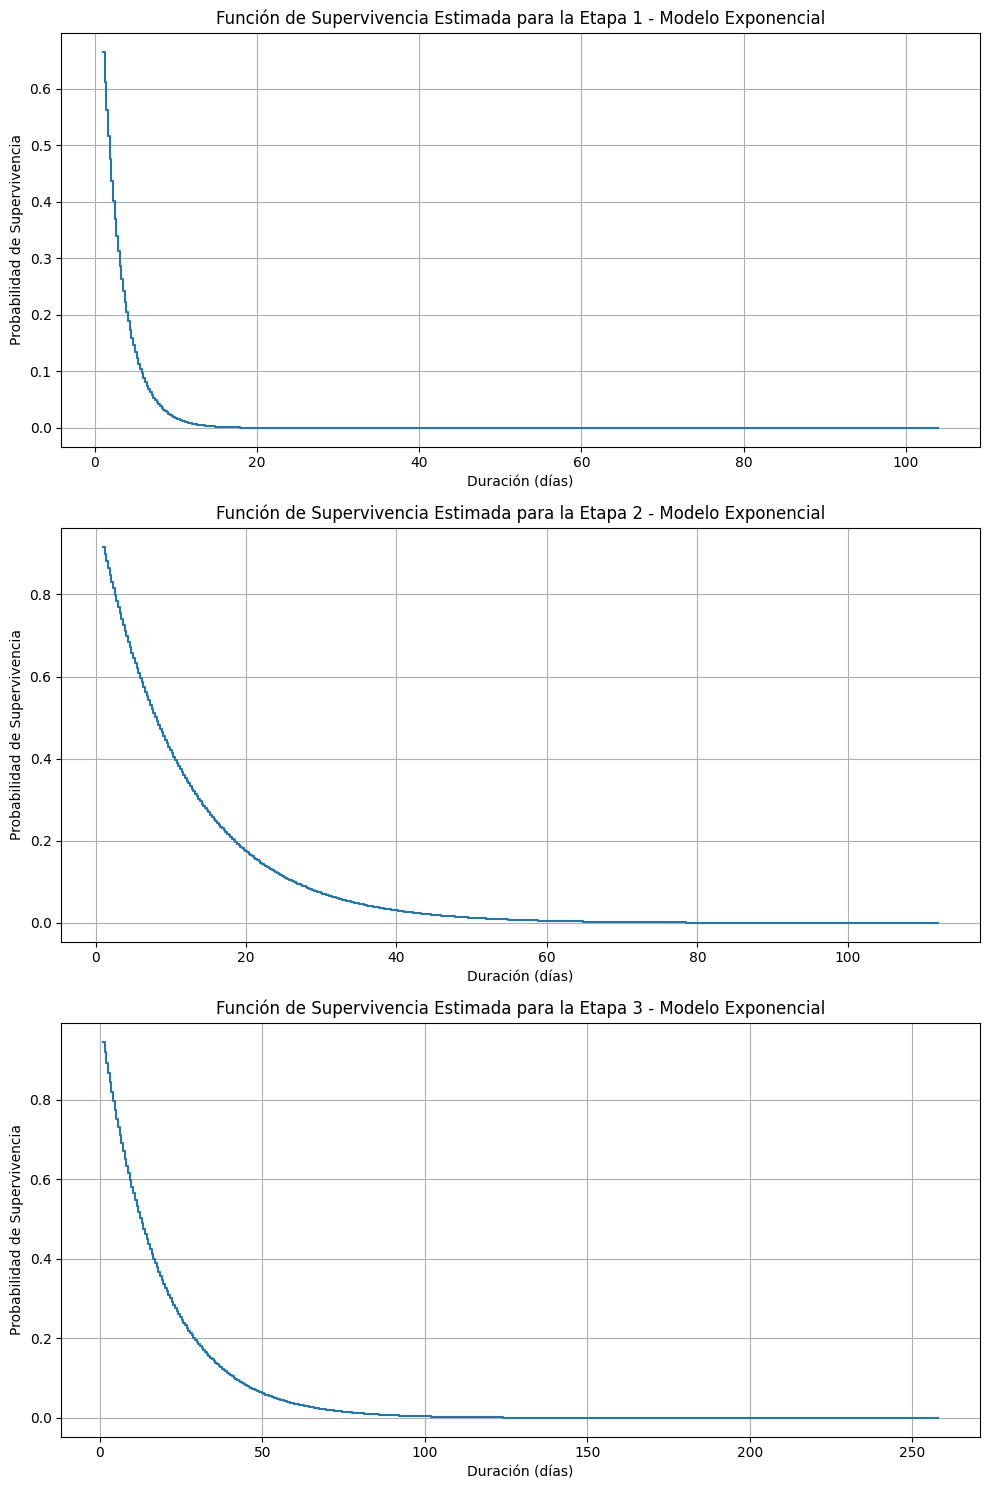

In [ ]:
exponencial = df_analysis.copy()


# Calculando la duración en días

exponencial['DuracionEtapa1'] = (exponencial['Fecha_AsisConcluida'] - exponencial['FechaApertura']).dt.days
exponencial['DuracionEtapa2'] = (exponencial['Fecha_Termino'] - exponencial['Fecha_AsisConcluida']).dt.days
exponencial['DuracionEtapa3'] = (exponencial['FechasRegisFactura'] - exponencial['Fecha_Termino']).dt.days

# Identificando registros censurados
exponencial['Censurado1'] = exponencial['Fecha_AsisConcluida'].notna().astype(int)
exponencial['Censurado2'] = exponencial['Fecha_Termino'].notna().astype(int)
exponencial['Censurado3'] = exponencial['FechasRegisFactura'].notna().astype(int)

exponencial_clean = exponencial.dropna(subset=['DuracionEtapa1', 'Censurado1', 'DuracionEtapa2', 'Censurado2', 'DuracionEtapa3', 'Censurado3'])
exponencial_clean = exponencial_clean[(exponencial_clean['DuracionEtapa1'] > 0) & (exponencial_clean['DuracionEtapa2'] > 0) & (exponencial_clean['DuracionEtapa3'] > 0)]


# Inicialización de las figuras para las gráficas
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for i, (duration_col, event_col, ax) in enumerate(zip(['DuracionEtapa1', 'DuracionEtapa2', 'DuracionEtapa3'],
                                                      ['Censurado1', 'Censurado2', 'Censurado3'],
                                                      axes), start=1):
    # Ajuste del modelo Exponencial para cada etapa
    exp_fitter = ExponentialFitter()
    exp_fitter.fit(exponencial_clean[duration_col], exponencial_clean[event_col], label=f'Etapa {i}')

    # La función de supervivencia estimada se obtiene directamente
    S = exp_fitter.survival_function_

    # Gráfico de la función de supervivencia para cada etapa
    ax.step(S.index, S.iloc[:, 0], where="post")
    ax.set_title(f'Función de Supervivencia Estimada para la Etapa {i} - Modelo Exponencial')
    ax.set_xlabel('Duración (días)')
    ax.set_ylabel('Probabilidad de Supervivencia')
    ax.grid(True)

plt.tight_layout()
plt.show()

Vamos a comparar el modelo exponencial con los datos reales para poder observar como se ajusta el modelo




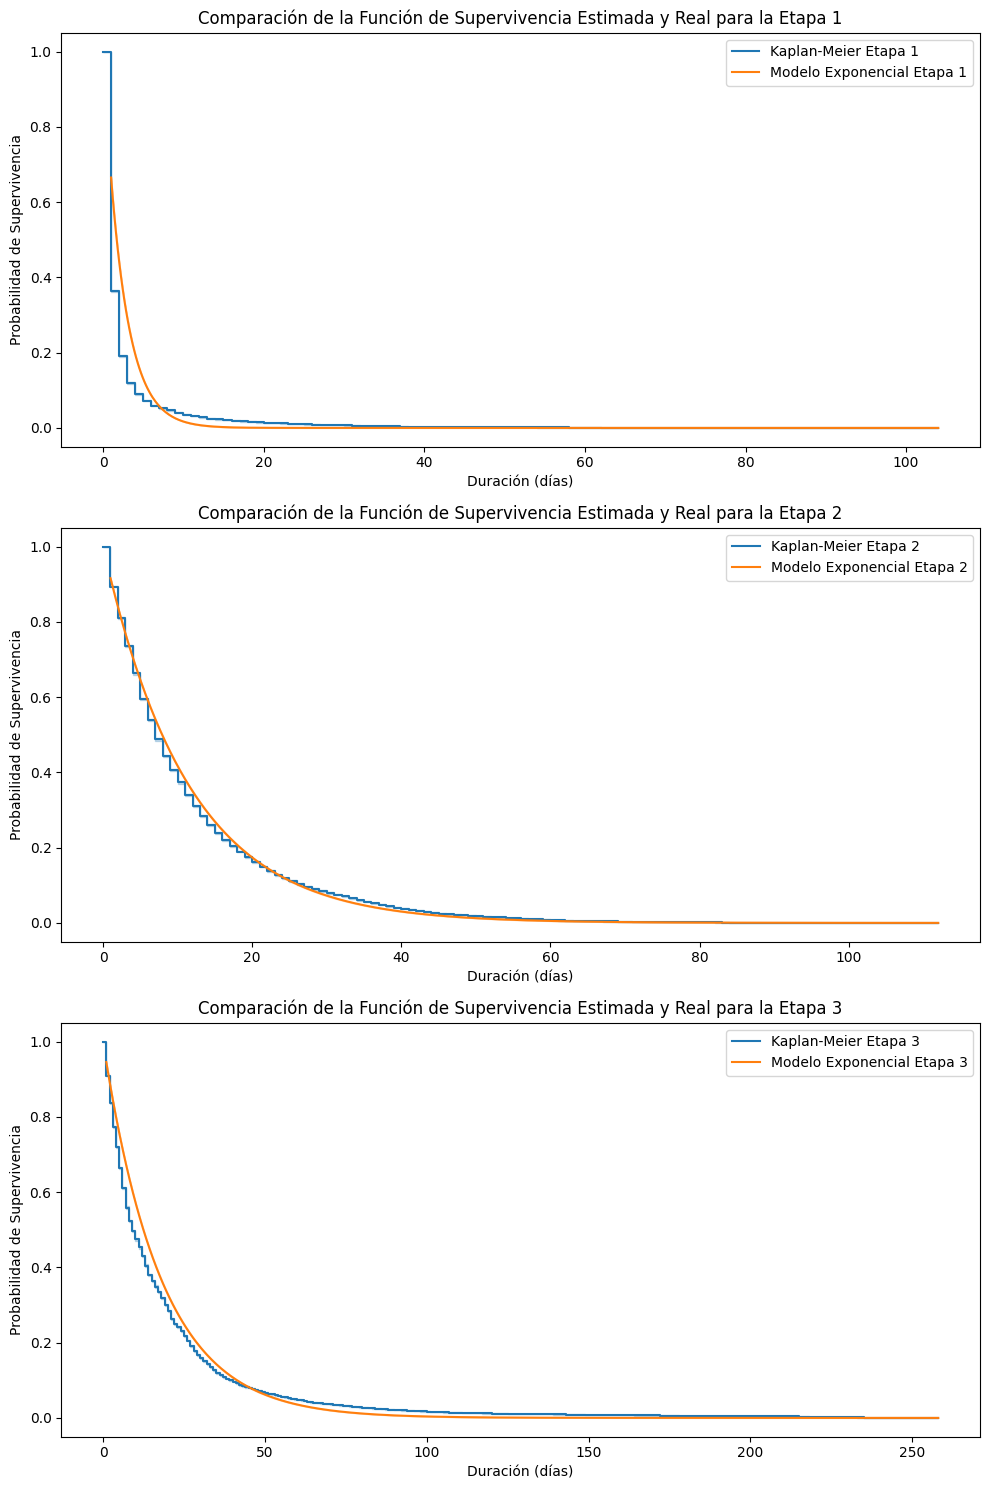

In [ ]:
# Crear objetos KaplanMeierFitter y ExponentialFitter para cada etapa

kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()
kmf3 = KaplanMeierFitter()

exp_fitter1 = ExponentialFitter()
exp_fitter2 = ExponentialFitter()
exp_fitter3 = ExponentialFitter()

# Ajustar los modelos para cada etapa

kmf1.fit(exponencial_clean['DuracionEtapa1'], event_observed=exponencial_clean['Censurado1'])
kmf2.fit(exponencial_clean['DuracionEtapa2'], event_observed=exponencial_clean['Censurado2'])
kmf3.fit(exponencial_clean['DuracionEtapa3'], event_observed=exponencial_clean['Censurado3'])

exp_fitter1.fit(exponencial_clean['DuracionEtapa1'], exponencial_clean['Censurado1'])
exp_fitter2.fit(exponencial_clean['DuracionEtapa2'], exponencial_clean['Censurado2'])
exp_fitter3.fit(exponencial_clean['DuracionEtapa3'], exponencial_clean['Censurado3'])


# Crear subplots para las tres etapas
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Graficar las curvas de supervivencia de Kaplan-Meier y el modelo exponencial para cada etapa
for i, (kmf, exp_fitter, ax) in enumerate(zip([kmf1, kmf2, kmf3], [exp_fitter1, exp_fitter2, exp_fitter3], axes), start=1):
    kmf.plot_survival_function(ax=ax, label=f'Kaplan-Meier Etapa {i}')
    exp_fitter.plot_survival_function(ax=ax, label=f'Modelo Exponencial Etapa {i}')
    ax.set_title(f'Comparación de la Función de Supervivencia Estimada y Real para la Etapa {i}')
    ax.set_xlabel('Duración (días)')
    ax.set_ylabel('Probabilidad de Supervivencia')
    ax.legend()

plt.tight_layout()
plt.show()



Etapa 1: Las curvas de Kaplan-Meier y del modelo exponencial están bastante cerca una de la otra, lo que sugiere que el modelo exponencial proporciona un ajuste razonablemente bueno a los datos reales para la duración más corta de eventos.

Etapa 2: Similar a la Etapa 1, las curvas de Kaplan-Meier y del modelo exponencial están cercanas, aunque se puede observar una ligera separación a medida que aumenta la duración. Esto nos puede indicar que el modelo exponencial no captura perfectamente todos los patrones en los datos, especialmente para tiempos de supervivencia más largos.

Etapa 3: La tendencia observada en las etapas anteriores se mantiene, con ambas curvas siguiendo una trayectoria similar. La curva del modelo exponencial parece ajustarse bien a la curva de Kaplan-Meier, indicando que el supuesto de una tasa de riesgo constante puede ser adecuado para estos datos.

En general, el modelo de supervivencia exponencial es uno de los modelos paramétricos más sencillos. Asume una tasa de fallo constante, por lo que no considera covariables que puedan afectar la duración de las etapas de un servicio.

**Modelo supervivencia paramétrico Weibull**

In [ ]:
weibull = df_analysis.copy()


# Calculando la duración en días

weibull['DuracionEtapa1'] = (weibull['Fecha_AsisConcluida'] - weibull['FechaApertura']).dt.days
weibull['DuracionEtapa2'] = (weibull['Fecha_Termino'] - weibull['Fecha_AsisConcluida']).dt.days
weibull['DuracionEtapa3'] = (weibull['FechasRegisFactura'] - weibull['Fecha_Termino']).dt.days

# Identificando registros censurados
weibull['Censurado1'] = weibull['Fecha_AsisConcluida'].notna().astype(int)
weibull['Censurado2'] = weibull['Fecha_Termino'].notna().astype(int)
weibull['Censurado3'] = weibull['FechasRegisFactura'].notna().astype(int)

weibull_clean = weibull.dropna(subset=['DuracionEtapa1', 'Censurado1', 'DuracionEtapa2', 'Censurado2', 'DuracionEtapa3', 'Censurado3'])
weibull_clean = weibull_clean[weibull_clean['DuracionEtapa1'] > 0]
weibull_clean = weibull_clean[weibull_clean['DuracionEtapa2'] > 0]
weibull_clean = weibull_clean[weibull_clean['DuracionEtapa3'] > 0]

#Modelo Weibull

wf1 = WeibullFitter()
wf2 = WeibullFitter()
wf3 = WeibullFitter()


wf1.fit(durations=weibull_clean['DuracionEtapa1'], event_observed=weibull_clean['Censurado1'])
wf2.fit(durations=weibull_clean['DuracionEtapa2'], event_observed=weibull_clean['Censurado2'])
wf3.fit(durations=weibull_clean['DuracionEtapa3'], event_observed=weibull_clean['Censurado3'])


print("Etapa 1:", wf1.summary)
print("Etapa 2:", wf2.summary)
print("Etapa 3:", wf3.summary)


Etapa 1:              coef  se(coef)  coef lower 95%  coef upper 95%  cmp to  \
lambda_  2.387481  0.008450        2.370920        2.404042     1.0   
rho_     0.957212  0.001896        0.953497        0.960927     1.0   

                  z              p    -log2(p)  
lambda_  164.204264   0.000000e+00         inf  
rho_     -22.572713  8.036183e-113  372.371364  
Etapa 2:               coef  se(coef)  coef lower 95%  coef upper 95%  cmp to  \
lambda_  11.562469  0.037918       11.488151       11.636786     1.0   
rho_      1.025554  0.002448        1.020757        1.030351     1.0   

                  z             p   -log2(p)  
lambda_  278.563290  0.000000e+00        inf  
rho_      10.440268  1.623509e-25  82.349087  
Etapa 3:               coef  se(coef)  coef lower 95%  coef upper 95%  cmp to  \
lambda_  16.566591  0.064133       16.440893       16.692289     1.0   
rho_      0.869389  0.002017        0.865436        0.873343     1.0   

                  z    p  -log2(p)  


Resultados:

Etapa 1:

Lambda (λ): 2.387, El tiempo que estima que van a concluirse los servicios en la etapa 1. Es la etapa con menor tiempo ya que es la duración del servicio y al ser servicios de emergancia, deben de ser concluidos en el menor tiempo posible

Rho (ρ): 0.957, Nos indica una tasa de fallo decreciente con el tiempo, aunque muy cerca de ser constante.


Etapa 2:

Lambda (λ): 11.562, El tiempo que estima que van a concluirse los servicios en la etapa 2, que es mucho mayor que la etapa 1.

Rho (ρ): 1.026, Nos indica una tasa de fallo que aumenta ligeramente con el tiempo.

Etapa 3:

Lambda (λ): 16.567, El tiempo que estima que van a concluirse los servicios en la etapa 3, y es mayor que las 2 anteriores, que es normal, ya que es el tiempo en que tardan en validar y pagar al proveedor.


Rho (ρ): 0.869, menor que 1, indicando una tasa de fallo que decrece con el tiempo, lo que sugiere que cuanto más tiempo pasa, menor es el riesgo de que ocurra el evento en esta etapa.

Gráfico Log-Log nos va ayudar a verificar la adecuación del Modelo Weibull


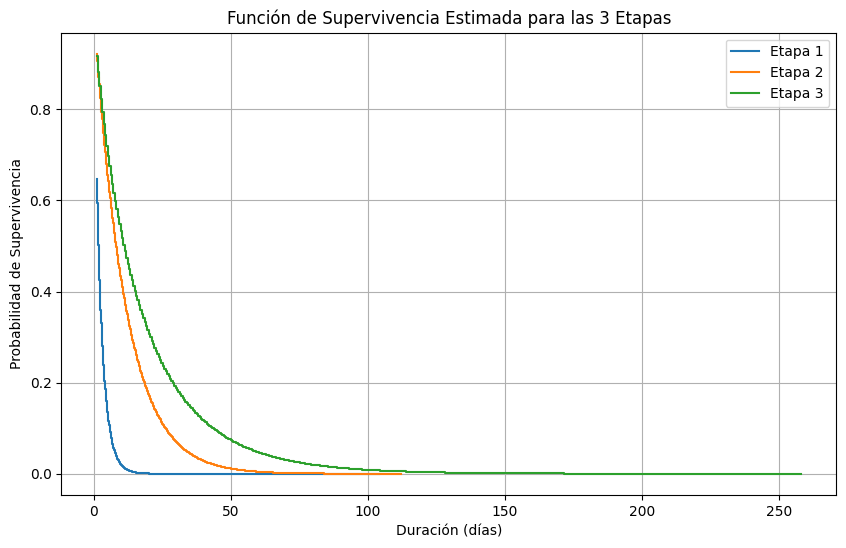

In [ ]:
# Supervivencia estimadas
S1 = wf1.survival_function_
S2 = wf2.survival_function_
S3 = wf3.survival_function_

#Gráfica

plt.figure(figsize=(10, 6))


plt.step(S1.index, S1['Weibull_estimate'], where="post", label='Etapa 1')
plt.step(S2.index, S2['Weibull_estimate'], where="post", label='Etapa 2')
plt.step(S3.index, S3['Weibull_estimate'], where="post", label='Etapa 3')

plt.title('Función de Supervivencia Estimada para las 3 Etapas')
plt.xlabel('Duración (días)')
plt.ylabel('Probabilidad de Supervivencia')
plt.legend()
plt.grid(True)

plt.show()

Análisis:

Etapa 1: La curva azul muestra una rápida disminución en la probabilidad de supervivencia al principio, lo que nos indica que los eventos de interés ocurren con mayor frecuencia al comienzo de esta etapa.

Etapa 2: La curva naranja decrece más lentamente en comparación con la etapa 1, lo que nos podría indicar que los eventos son menos frecuentes y tiende un efecto en prolongar la supervivencia del servicio.

Etapa 3: Nos indica una mayor duración de supervivencia.

Prueba de Bondad de Ajuste

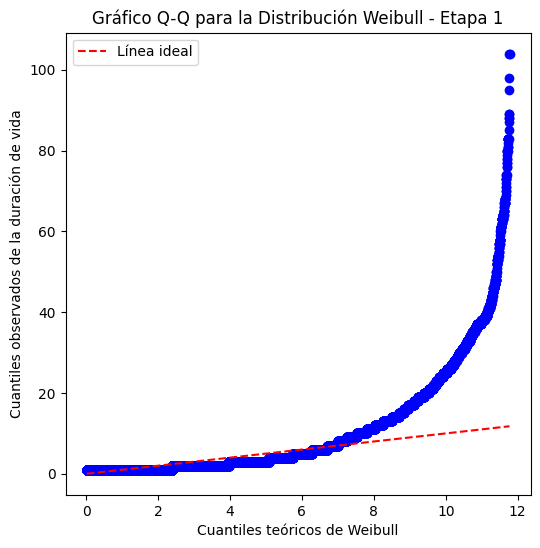

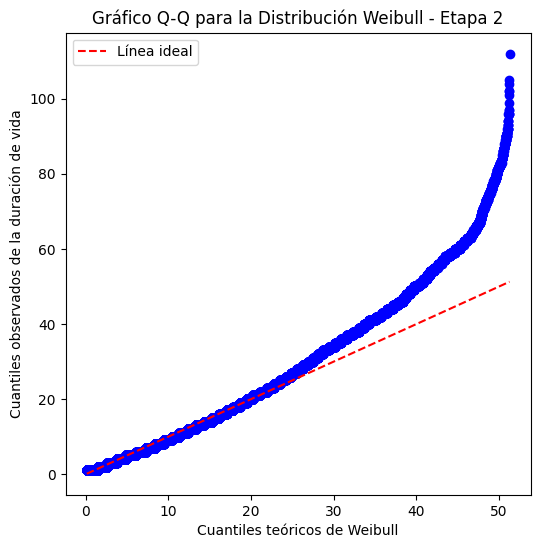

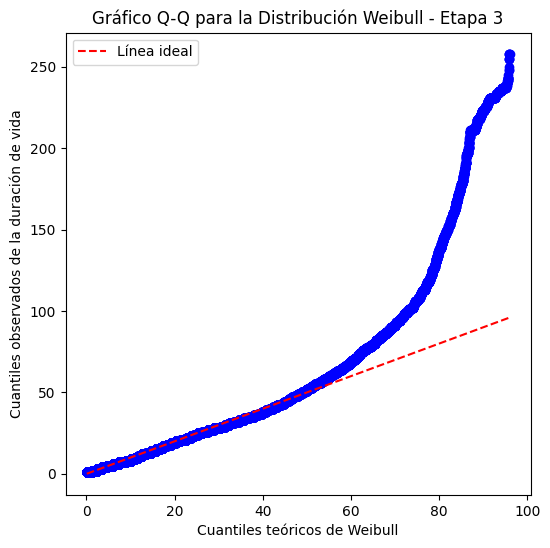

In [ ]:
# Ajuste del modelo Weibull para cada etapa y creación de los gráficos Q-Q
for i, (duration_col, event_col) in enumerate([('DuracionEtapa1', 'Censurado1'),
                                                ('DuracionEtapa2', 'Censurado2'),
                                                ('DuracionEtapa3', 'Censurado3')], start=1):
    # Ajustar el modelo Weibull
    wf = WeibullFitter()
    wf.fit(weibull_clean[duration_col], weibull_clean[event_col], label=f'Etapa {i}')

    # Filtrar para incluir solo los eventos no censurados
    observed_lifetimes = weibull_clean.loc[weibull_clean[event_col] == 1, duration_col]

    # Calcular cuantiles observados
    observed_quantiles = np.percentile(observed_lifetimes, np.linspace(0, 100, len(observed_lifetimes)))

    # Calcular cuantiles teóricos usando los parámetros estimados del modelo
    theoretical_quantiles = stats.weibull_min.ppf(np.linspace(0.01, 0.99, len(observed_lifetimes)), c=wf.rho_, scale=wf.lambda_)

    # Gráfico Q-Q
    plt.figure(figsize=(6, 6))
    plt.scatter(theoretical_quantiles, observed_quantiles, color='blue')
    plt.plot(theoretical_quantiles, theoretical_quantiles, color='red', linestyle='--', label="Línea ideal")
    plt.title(f'Gráfico Q-Q para la Distribución Weibull - Etapa {i}')
    plt.xlabel('Cuantiles teóricos de Weibull')
    plt.ylabel('Cuantiles observados de la duración de vida')
    plt.legend()
    plt.show()

Etapa 1: Los puntos siguen bastante de cerca la línea roja punteada en el rango inferior de cuantiles teóricos, lo que indica que el modelo de Weibull podría ser un buen ajuste para los tiempos de supervivencia más cortos. Sin embargo, para los valores más altos, los puntos se desvían significativamente de la línea, lo que indica que el modelo no captura bien la cola de la distribución.

Etapa 2: Al igual que en la Etapa 1, los puntos siguen la línea en los cuantiles inferiores pero se desvían en los cuantiles superiores. La desviación parece comenzar más temprano y es más pronunciada en comparación con la Etapa 1.

Etapa 3: La desviación de la línea roja punteada comienza desde cuantiles teóricos más bajos en comparación con las Etapas 1 y 2, y la desviación es aún más pronunciada. Esto sugiere que el modelo de Weibull no es un buen ajuste para los datos de la Etapa 3, especialmente en la cola de la distribución.

Etapa 1: Los puntos siguen bastante de cerca la línea roja punteada en el rango inferior de cuantiles teóricos, lo que indica que el modelo de Weibull podría ser un buen ajuste para los tiempos de supervivencia más cortos. Sin embargo, para los valores más altos, los puntos se desvían significativamente de la línea, lo que indica que el modelo no captura bien la cola de la distribución.

Etapa 2: Al igual que en la Etapa 1, los puntos siguen la línea en los cuantiles inferiores pero se desvían en los cuantiles superiores. La desviación parece comenzar más temprano y es más pronunciada en comparación con la Etapa 1.

Etapa 3: La desviación de la línea roja punteada comienza desde cuantiles teóricos más bajos en comparación con las Etapas 1 y 2, y la desviación es aún más pronunciada. Esto sugiere que el modelo de Weibull no es un buen ajuste para los datos de la Etapa 3, especialmente en la cola de la distribución.

En conclusión el modelo de Weibull no proporciona un buen ajuste para los datos para los tiempos de supervivencia más largos.

**Modelo supervivencia paramétrico log-normal**




El modelo de supervivencia log-normal es un modelo paramétrico que asume que el logaritmo de los tiempos de supervivencia sigue una distribución normal. Es útil cuando los datos de supervivencia tienen una forma que es asimétricamente sesgada y pueden tener una larga cola hacia la derecha, que podría ser el caso de nuestros datos.

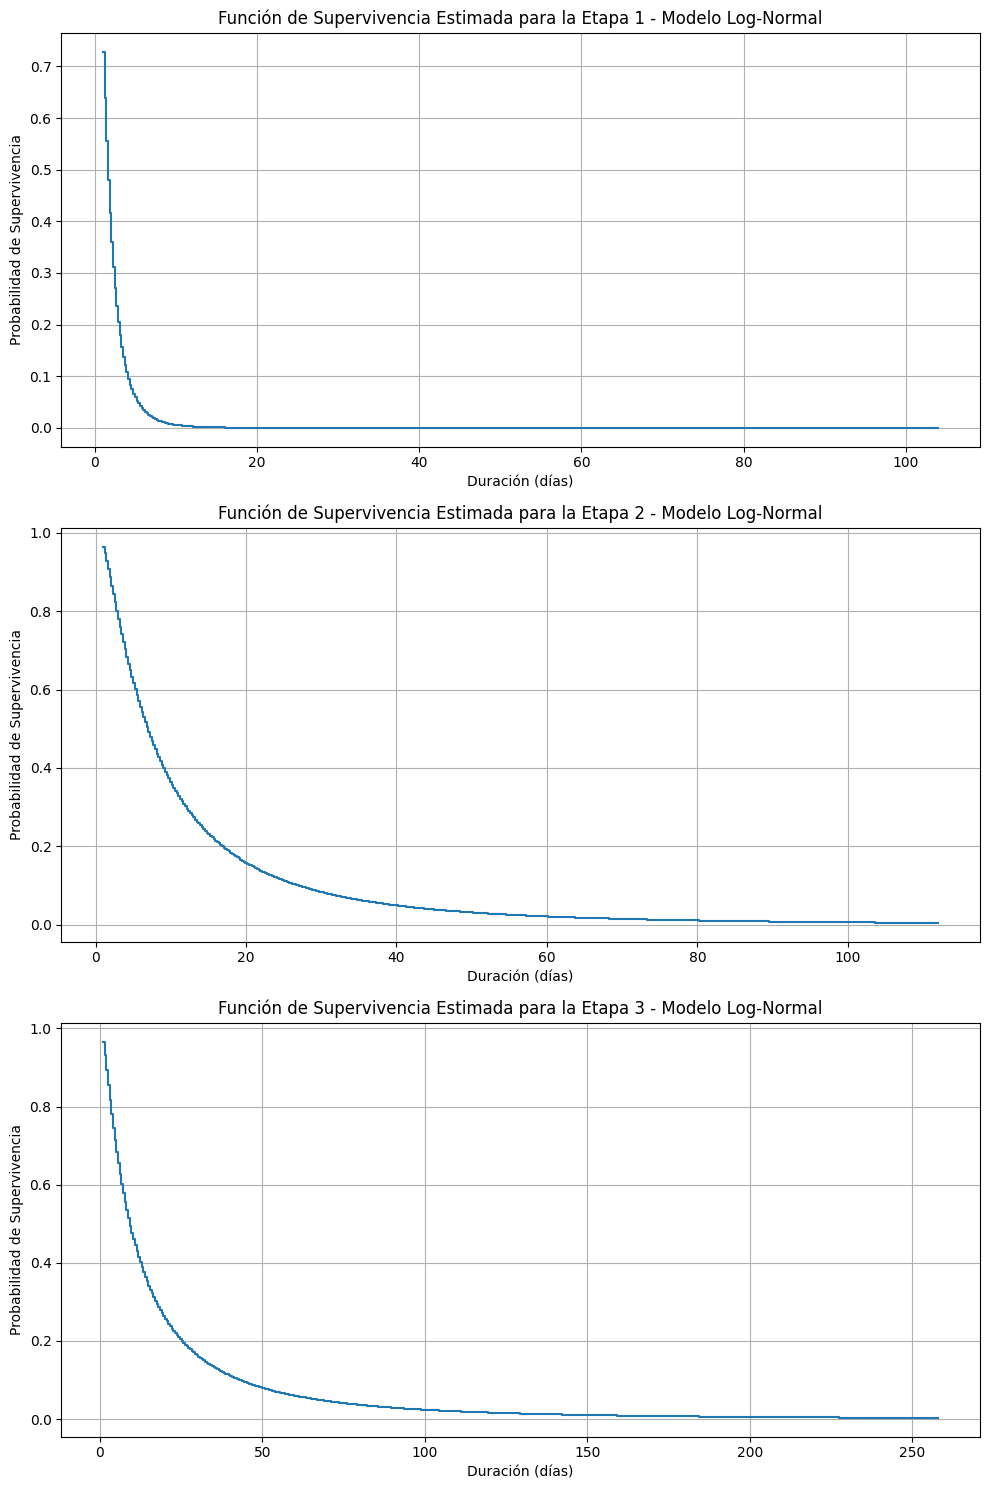

In [ ]:
lognormal = df_analysis.copy()

# Calculando la duración en días

lognormal['DuracionEtapa1'] = (lognormal['Fecha_AsisConcluida'] - lognormal['FechaApertura']).dt.days
lognormal['DuracionEtapa2'] = (lognormal['Fecha_Termino'] - lognormal['Fecha_AsisConcluida']).dt.days
lognormal['DuracionEtapa3'] = (lognormal['FechasRegisFactura'] - lognormal['Fecha_Termino']).dt.days

# Identificando registros censurados
lognormal['Censurado1'] = lognormal['Fecha_AsisConcluida'].notna().astype(int)
lognormal['Censurado2'] = lognormal['Fecha_Termino'].notna().astype(int)
lognormal['Censurado3'] = lognormal['FechasRegisFactura'].notna().astype(int)

lognormal_clean = lognormal.dropna(subset=['DuracionEtapa1', 'Censurado1', 'DuracionEtapa2', 'Censurado2', 'DuracionEtapa3', 'Censurado3'])
lognormal_clean = lognormal_clean[lognormal_clean['DuracionEtapa1'] > 0]
lognormal_clean = lognormal_clean[lognormal_clean['DuracionEtapa2'] > 0]
lognormal_clean = lognormal_clean[lognormal_clean['DuracionEtapa3'] > 0]



fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for i, (duration_col, event_col, ax) in enumerate(zip(['DuracionEtapa1', 'DuracionEtapa2', 'DuracionEtapa3'],
                                                      ['Censurado1', 'Censurado2', 'Censurado3'],
                                                      axes), start=1):
    # Ajuste del modelo log-normal para cada etapa
    ln_fitter = LogNormalFitter()
    ln_fitter.fit(lognormal_clean[duration_col], lognormal_clean[event_col], label=f'Etapa {i}')

    # Extracción de la función de supervivencia estimada
    S = ln_fitter.survival_function_

    # Gráfico de la función de supervivencia para cada etapa
    ax.step(S.index, S.iloc[:, 0], where="post")  # Solo hay una columna en el DataFrame de supervivencia
    ax.set_title(f'Función de Supervivencia Estimada para la Etapa {i} - Modelo Log-Normal')
    ax.set_xlabel('Duración (días)')
    ax.set_ylabel('Probabilidad de Supervivencia')
    ax.grid(True)

plt.tight_layout()
plt.show()

Vamos a comparar el modelo og-normal con los datos reales para poder observar como se ajusta el modelo

---



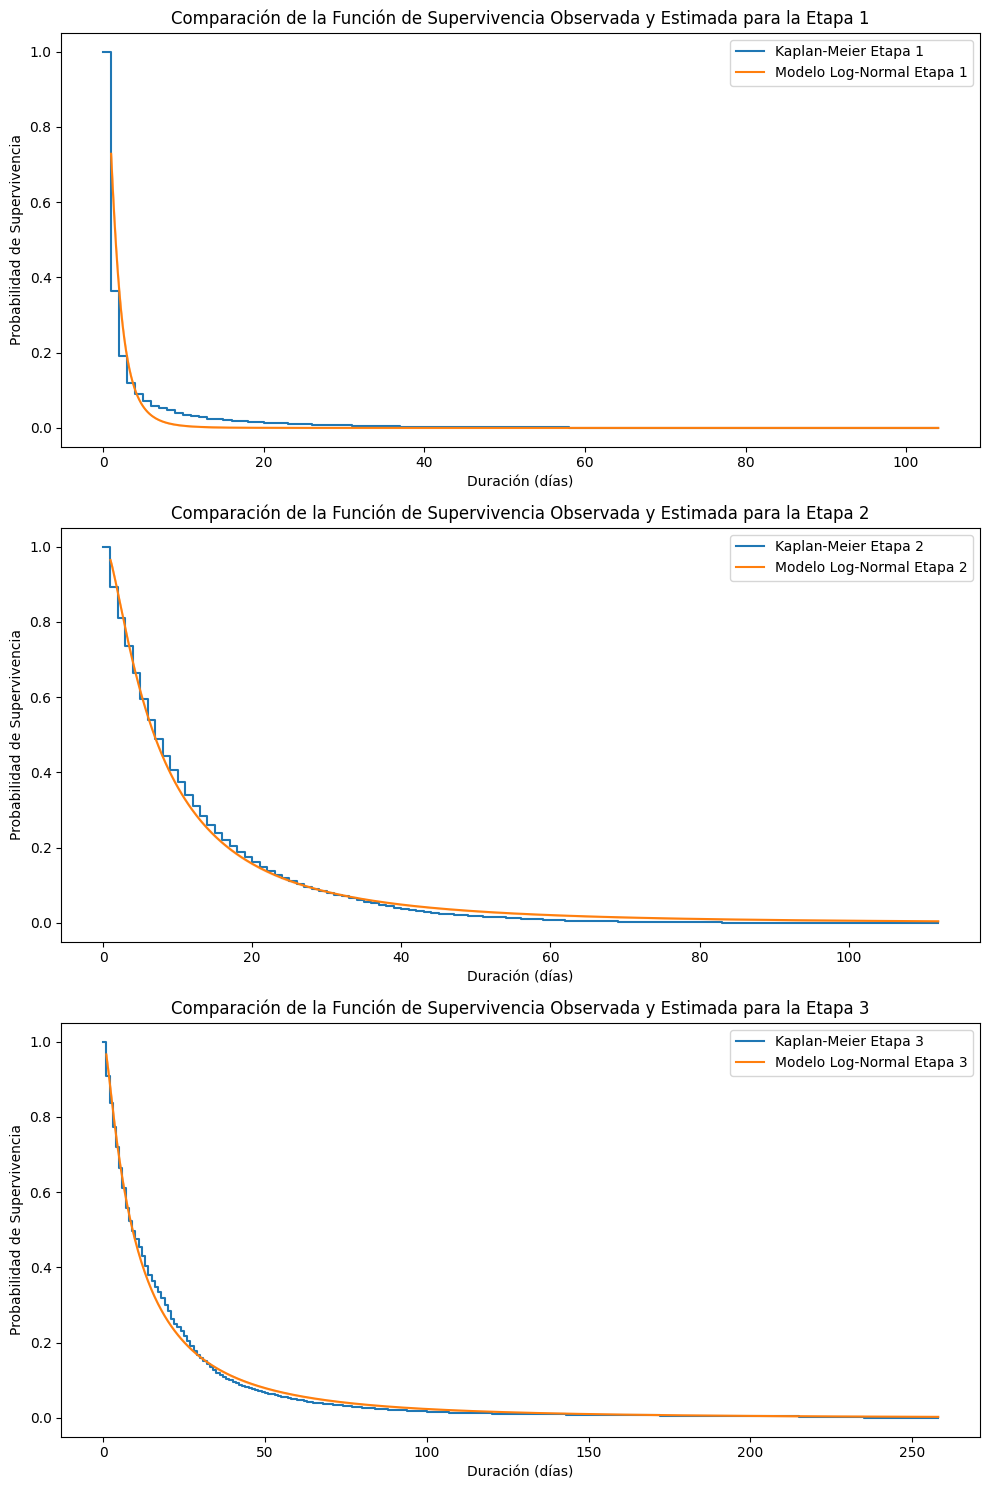

In [ ]:
# Objetos de Kaplan-Meier y LogNormalFitter para cada etapa

kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()
kmf3 = KaplanMeierFitter()

ln_fitter1 = LogNormalFitter()
ln_fitter2 = LogNormalFitter()
ln_fitter3 = LogNormalFitter()

# Ajuste de los objetos de Kaplan-Meier y LogNormalFitter

kmf1.fit(lognormal_clean['DuracionEtapa1'], event_observed=lognormal_clean['Censurado1'])
kmf2.fit(lognormal_clean['DuracionEtapa2'], event_observed=lognormal_clean['Censurado2'])
kmf3.fit(lognormal_clean['DuracionEtapa3'], event_observed=lognormal_clean['Censurado3'])

ln_fitter1.fit(lognormal_clean['DuracionEtapa1'], event_observed=lognormal_clean['Censurado1'])
ln_fitter2.fit(lognormal_clean['DuracionEtapa2'], event_observed=lognormal_clean['Censurado2'])
ln_fitter3.fit(lognormal_clean['DuracionEtapa3'], event_observed=lognormal_clean['Censurado3'])

# Gráfica
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for i, (kmf, ln_fitter, ax) in enumerate(zip([kmf1, kmf2, kmf3],
                                              [ln_fitter1, ln_fitter2, ln_fitter3],
                                              axes), start=1):
    # Graficar la función de supervivencia de Kaplan-Meier (observada)
    kmf.plot_survival_function(ax=ax, ci_show=False, label=f'Kaplan-Meier Etapa {i}')

    # Graficar la función de supervivencia del modelo log-normal (estimada)
    ln_fitter.plot_survival_function(ax=ax, label=f'Modelo Log-Normal Etapa {i}')

    # Títulos y etiquetas
    ax.set_title(f'Comparación de la Función de Supervivencia Observada y Estimada para la Etapa {i}')
    ax.set_xlabel('Duración (días)')
    ax.set_ylabel('Probabilidad de Supervivencia')
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
#Análisis cuantitativo


# Encuentra el tiempo donde la función de supervivencia cruza 0.5
def find_median_survival_time(survival_function):
    median_survival_time = survival_function[survival_function <= 0.5].index[0]
    return median_survival_time

# Calcula la función de supervivencia en los tiempos observados
sf1 = ln_fitter1.survival_function_at_times(lognormal_clean['DuracionEtapa1'])
sf2 = ln_fitter2.survival_function_at_times(lognormal_clean['DuracionEtapa2'])
sf3 = ln_fitter3.survival_function_at_times(lognormal_clean['DuracionEtapa3'])

# Aplica la función para encontrar la mediana para cada etapa
median_survival_time_1 = find_median_survival_time(sf1)
median_survival_time_2 = find_median_survival_time(sf2)
median_survival_time_3 = find_median_survival_time(sf3)

# Ahora calcula el C-index con la mediana encontrada
c_index_etapa1 = concordance_index(lognormal_clean['DuracionEtapa1'], [median_survival_time_1] * len(lognormal_clean), lognormal_clean['Censurado1'])
c_index_etapa2 = concordance_index(lognormal_clean['DuracionEtapa2'], [median_survival_time_2] * len(lognormal_clean), lognormal_clean['Censurado2'])
c_index_etapa3 = concordance_index(lognormal_clean['DuracionEtapa3'], [median_survival_time_3] * len(lognormal_clean), lognormal_clean['Censurado3'])

# Imprime los C-index calculados
print(f"C-index Etapa 1: {c_index_etapa1}")
print(f"C-index Etapa 2: {c_index_etapa2}")
print(f"C-index Etapa 3: {c_index_etapa3}")

C-index Etapa 1: 0.5
C-index Etapa 2: 0.5
C-index Etapa 3: 0.5



Un C-index de 0.5 para todas las etapas con las medianas de supervivencia nos puede indicar que los modelos tienen una capacidad predictiva no mejor que el azar. Este resultado

Los modelos log-normales asumen una distribución específica de los tiempos de supervivencia. Si esta suposición no se ajusta bien a tus datos, el modelo podría no capturar adecuadamente la complejidad

**Modelo supervivencia paramétrico log-logística**


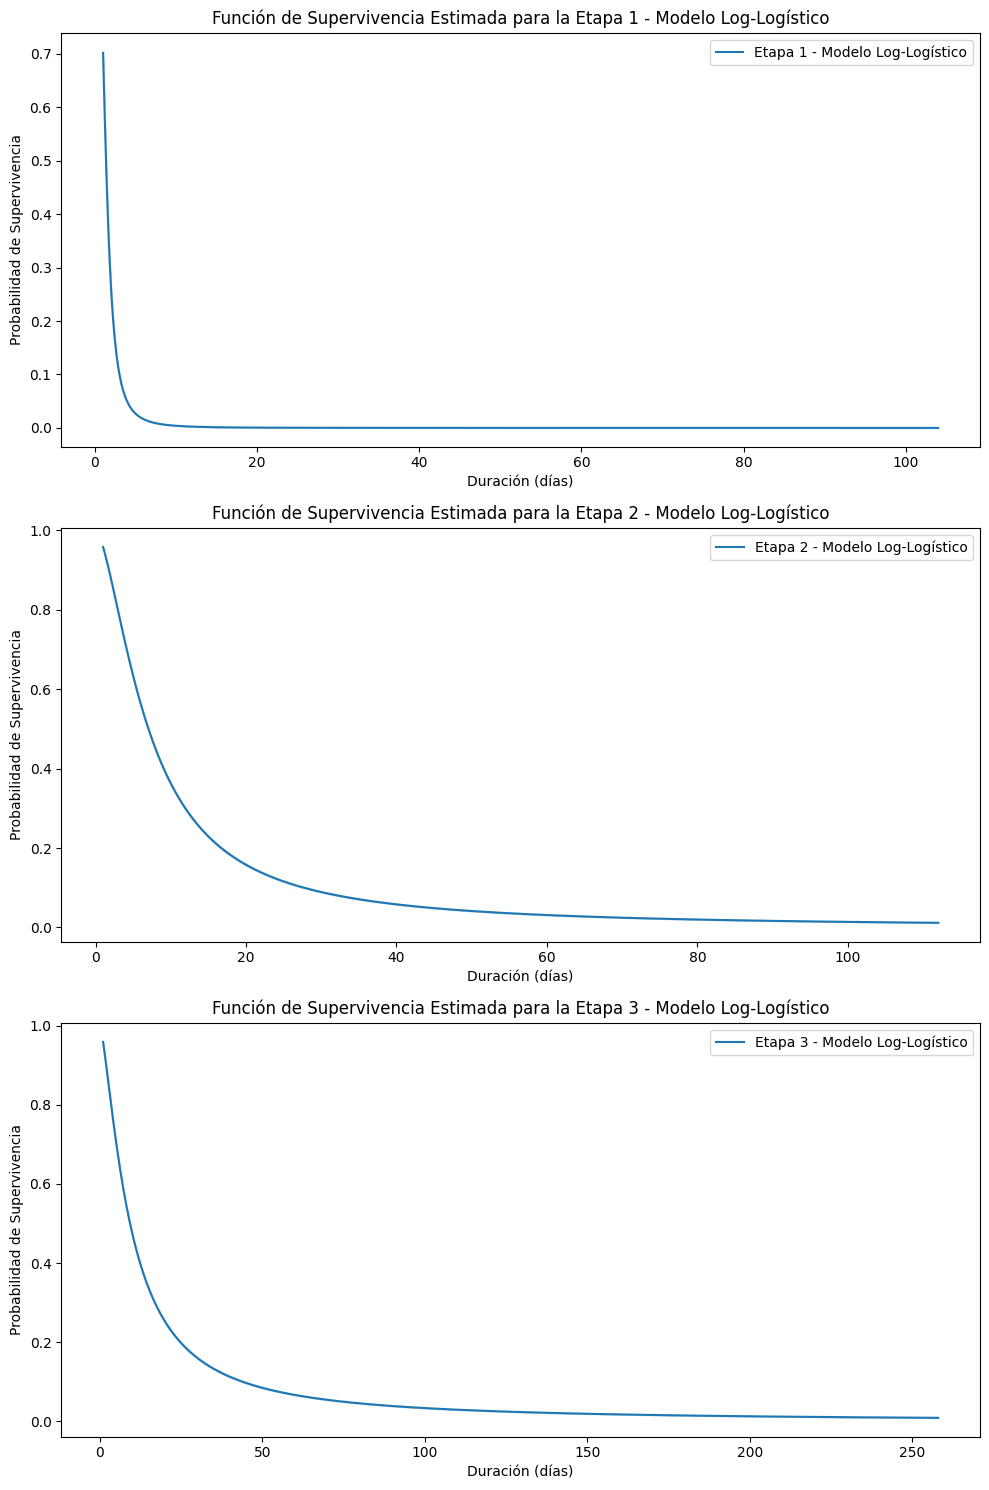

In [ ]:
loglogistica = df_analysis.copy()

# Calculando la duración en días

loglogistica['DuracionEtapa1'] = (loglogistica['Fecha_AsisConcluida'] - loglogistica['FechaApertura']).dt.days
loglogistica['DuracionEtapa2'] = (loglogistica['Fecha_Termino'] - loglogistica['Fecha_AsisConcluida']).dt.days
loglogistica['DuracionEtapa3'] = (loglogistica['FechasRegisFactura'] - loglogistica['Fecha_Termino']).dt.days

# Identificando registros censurados
loglogistica['Censurado1'] = loglogistica['Fecha_AsisConcluida'].notna().astype(int)
loglogistica['Censurado2'] = loglogistica['Fecha_Termino'].notna().astype(int)
loglogistica['Censurado3'] = loglogistica['FechasRegisFactura'].notna().astype(int)

loglogistica_clean = loglogistica.dropna(subset=['DuracionEtapa1', 'Censurado1', 'DuracionEtapa2', 'Censurado2', 'DuracionEtapa3', 'Censurado3'])
loglogistica_clean = loglogistica_clean[loglogistica_clean['DuracionEtapa1'] > 0]
loglogistica_clean = loglogistica_clean[loglogistica_clean['DuracionEtapa2'] > 0]
loglogistica_clean = loglogistica_clean[loglogistica_clean['DuracionEtapa3'] > 0]


# Inicialización del modelo Log-Logístico para cada etapa
llf1 = LogLogisticFitter()
llf2 = LogLogisticFitter()
llf3 = LogLogisticFitter()

# Ajuste del modelo a los datos
llf1.fit(loglogistica_clean['DuracionEtapa1'], event_observed=loglogistica_clean['Censurado1'])
llf2.fit(loglogistica_clean['DuracionEtapa2'], event_observed=loglogistica_clean['Censurado2'])
llf3.fit(loglogistica_clean['DuracionEtapa3'], event_observed=loglogistica_clean['Censurado3'])

# Inicialización de la figura para las gráficas
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for i, (ll_fitter, ax) in enumerate(zip([llf1, llf2, llf3], axes), start=1):
    # Gráfico de la función de supervivencia para cada etapa
    ll_fitter.plot_survival_function(ax=ax, label=f'Etapa {i} - Modelo Log-Logístico')

    # Títulos y etiquetas
    ax.set_title(f'Función de Supervivencia Estimada para la Etapa {i} - Modelo Log-Logístico')
    ax.set_xlabel('Duración (días)')
    ax.set_ylabel('Probabilidad de Supervivencia')
    ax.legend()

plt.tight_layout()
plt.show()

Vamos a comparar el modelo Log logaritmica con los datos reales para poder observar como se ajusta el modelo

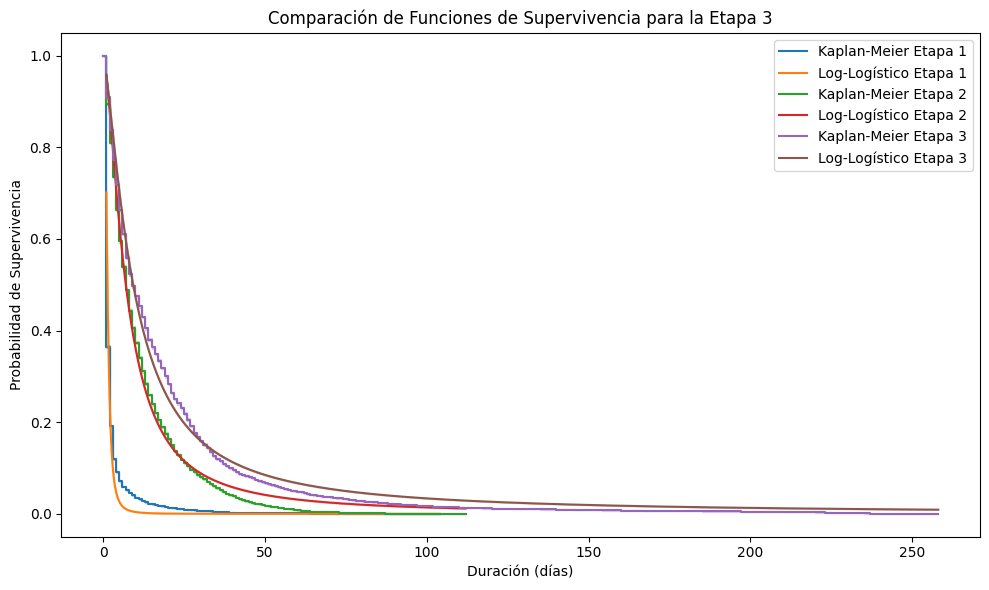

In [ ]:
# Ajustamos el modelo Kaplan-Meier
kmf = KaplanMeierFitter()

# Ajustamos el modelo Log-Logístico
llf = LogLogisticFitter()

# Inicializamos la figura
plt.figure(figsize=(10, 6))

# Ajustamos y graficamos para cada etapa
for i, duration_col, event_col in zip(range(1, 4),
                                      ['DuracionEtapa1', 'DuracionEtapa2', 'DuracionEtapa3'],
                                      ['Censurado1', 'Censurado2', 'Censurado3']):
    # Ajustar Kaplan-Meier
    kmf.fit(loglogistica_clean[duration_col], event_observed=loglogistica_clean[event_col])
    kmf.plot_survival_function(label=f'Kaplan-Meier Etapa {i}')

    # Ajustar Log-Logístico
    llf.fit(loglogistica_clean[duration_col], event_observed=loglogistica_clean[event_col])
    llf.plot_survival_function(label=f'Log-Logístico Etapa {i}')

    plt.title(f'Comparación de Funciones de Supervivencia para la Etapa {i}')
    plt.xlabel('Duración (días)')
    plt.ylabel('Probabilidad de Supervivencia')
    plt.legend()

plt.tight_layout()
plt.show()

## Modelo de regresión lineal para estimar la variable CostoPagado

Analizaremos qué tan efectivo es utilizar dicho modelo en la estimación del CostoPagado al capturar un nuevo evento de solicitud de servicio. Con el CostoPagado ya estimado, es posible utilizar el valor obtenido para

Veremos si es posible utilizar un modelo de regresión lineal para estimar el valor de CostoPagado para todos los nuevos registros de solicitudes de servicios que hubo en el día. Esta información nos es de importancia para saber cuánto dinero se requiere para cubrir las solicitudes "abiertas", que aún siguen en gestión y están pendientes de pagar. Con esta información, podemos estimar al finalizar la semana, cuánto dinero se va a requerir la semana siguiente considerando el avance que lleva la solicitud. Por ejemplo, si recibimos 100 solicitudes en un día, podemos utilizar la suma del costo por pagar estimado que se requerirá para cubrir dichas solicitudes, con dicha información y considerando los promedios de los tiempos de las 3 etapas del prceso, podemos estimar cuánto dinero se requerirá pagar en los próximos días.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import f_regression



df_reg = df_analysis[['CitaProg', 'importeprov', 'TieneCita', 'ProveedorAsignado',
       'Tiposervicio_index', 'Servicio_index', 'SubServicio_index',
       'EstatusExp_index', 'EntidadOrigen_index', 'MunicipioOrigen_index',
       'lugardelevento_index', 'EstatusProv_index', 'dsBlindaje_index',
       'ClasificaAuto_index', 'dsTipoAsignacion_index', 'Entidaddestino_index',
       'Municipiodestino_index', 'dsMarcaAuto_index', 'EstatusCXP_index',
       'clCuenta', 'CntMonitoreosAProveedor', 'CP',
       'Cl Proveedor', 'CostoPagado']].copy()

X = df_reg[['CitaProg', 'importeprov', 'TieneCita', 'ProveedorAsignado',
       'Tiposervicio_index', 'Servicio_index', 'SubServicio_index',
       'EstatusExp_index', 'EntidadOrigen_index', 'MunicipioOrigen_index',
       'lugardelevento_index', 'EstatusProv_index', 'dsBlindaje_index',
       'ClasificaAuto_index', 'dsTipoAsignacion_index', 'Entidaddestino_index',
       'Municipiodestino_index', 'dsMarcaAuto_index', 'EstatusCXP_index',
       'clCuenta', 'CntMonitoreosAProveedor', 'CP',
       'Cl Proveedor']]

y = df_reg['CostoPagado']  # Variable a estimar

# Entrenamiento y prueba considerando una división 80% - 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Modelo de Regresión Lineal
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')
# Prediciendo el costo a pagar por un nuevo servicio solicitado
features_new_row = [[False, True, False, True,
                       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
                       2595, 6, 67164, 11335 ]]
predicted_cash_outflow = model.predict(features_new_row)
print(f'Costo a pagar estimado: {predicted_cash_outflow[0]}')


MSE: 3926540.949284753
MAE: 759.21599102551
R^2: 0.23627173306468274
Costo a pagar estimado: 1086.1697353438644


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Interpretación de las métricas:

MSE (Mean Squared Error - Error Cuadrático Medio): 3,926,540.949

El MSE es una medida de la calidad del modelo que cuantifica el promedio de los cuadrados de los errores. En otras palabras, es el promedio de las diferencias al cuadrado entre los valores observados y los predichos. Un valor de MSE de 3,926,540.949 parece alto, lo que indica que las predicciones del modelo pueden estar bastante alejadas de los valores reales. La interpretación del MSE depende de la escala de tu variable objetivo; si los costos varían en un rango mucho mayor, este valor podría ser considerado aceptable. Sin embargo, en la mayoría de los contextos, un MSE de millones sugiere una precisión predictiva baja.

MAE (Mean Absolute Error - Error Absoluto Medio): 759.216

El MAE mide el promedio de las diferencias absolutas entre los valores predichos y los reales, ofreciendo una interpretación más directa que el MSE. Un MAE de 759.216 significa que, en promedio, las predicciones del modelo se desvían aproximadamente 759 unidades del valor real. La magnitud de este error debe considerarse en el contexto del rango de costos del servicio. Si el costo promedio es significativamente más alto que el MAE, el modelo podría ser útil; si es comparable o menor, el modelo puede no ser muy preciso. En el caso de la variable CostoPagado podemos observar que cuenta con un promedio de 1,082.33, con una desviación estándar de 2,263.94 y un rango de 0 a 120,000.00

R^2 (Coeficiente de Determinación): 0.236

El valor de varía entre 0 y 1, donde valores cercanos a 1 indican que el modelo explica una gran parte de la variabilidad de los datos. Un R^2 de 0.236 sugiere que el modelo solo explica aproximadamente el 23.6% de la variabilidad en el costo a pagar por el servicio. Esto indica una capacidad predictiva bastante baja, lo que significa que otros factores no considerados por el modelo pueden estar influyendo significativamente en el costo del servicio.

Costo a pagar estimado: 1086.17

Este valor representa una predicción puntual del modelo para un conjunto específico de características de entrada. La utilidad de esta predicción depende de la precisión general del modelo (como se indica por las métricas anteriores) y de cómo se compara este valor estimado con los costos reales observados en tus datos. En el caso del ejemplo utilizado para este cálculo, en la base de datos podemos observar que el CostoPagado por un servicio con dichas características fue 550, lo cual hace a la estimación limitada para su uso práctico.




##Conclusión Avance 4:

Los dos modelos que vamos a elegir son:

Modelo de Cox: Este modelo es especialmente útil en el contexto de machine learning cuando se abordan problemas que implican la estimación del tiempo hasta que ocurra un evento de interés, bajo la presencia de censura (es decir, cuando no todos los eventos de interés se han observado durante el período de estudio) y cuando se desea investigar cómo varias covariables o características influyen en el riesgo de que ocurra dicho evento. Este modelo nos permite identificar la variación entre las varialbes, además de ser flexible. Dado que vamos a llevar a cabo un análisis de supervivencia, el Modelo de Cox será de gran utilidad en nuestro proyecto.

Modelo Weibull:
El modelo Weibull es una herramienta estadística ampliamente utilizada en análisis de supervivencia, fiabilidad de sistemas y mantenimiento preventivo. Este modelo es particularmente útil debido a su flexibilidad para modelar diferentes tipos de tasas de fallo, desde decrecientes hasta constantes e incrementales, a través de su parámetro de forma. Para nuestro proyecto, nos es de gran importancia ya que nos permite una interpretación más directa de los tiempos de supervivencia y también nos puede acomodar tasas de riesgo crecientes o decrecientes.
